## King County House Regression - Project#2

* Student name: ***Aysu Erdemir***
* Student pace: ***Flex***
* Scheduled project review date/time: ***August, 2022***
* Instructor name: ***Claude Fried***

## Overview

- This project analyzes house sale data from King County WA to provide insights and recommendations about the kind of houses "We Buy Ugly Houses" should invest on for their business.  

## Business Problem

- We Buy Ugly Houses is a real estate investor (House Flipper) thay operates in King County WA. They purchase properties with the intention of remodeling to add value, then resell those properties for a profit. 

- They want to know what type of houses to invest on for higher profit. 


## Data

King County House Sales dataset from [Kaggle](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction) which  contains house sale prices for King County sold between May 2014 and May 2015. 

The variables/features included in the dataset are:

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
* `view` - Quality of view from house
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors


## Methods 

1. Clean the dataset.
2. Conduct feature engineering to come up with meaningful variables to be used in linear regression.
3. Build a series of linear regression models to come up with the best model to describe the relationship between the independent variables and the target/dependent variable (`house price`). 
4. Check the linear regression assumptions to make sure normality, Homoscadescacity are not violated and multicollinearity does not present.
5. Draw conclusions and make suggestions about the kind of houses to invest on. 


In [1]:
# Import standard packages

import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the Data
df = pd.read_csv("./data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21597, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
# Checking to see how many null values are present
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

- There are null values for `waterfront`, `view` and `yr_renovated`.

In [6]:
# Are there any rows duplicated?
df.duplicated().sum()

0

In [7]:
# Are there any house IDs duplicated?
df[df.duplicated('id')]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,NO,NONE,...,6 Low Average,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,NO,NONE,...,6 Low Average,1000,0.0,1943,NaN,98178,47.4897,-122.240,1020,7138
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,NO,NONE,...,7 Average,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,2/19/2015,645000.0,4,3.50,2910,5260,2.0,NO,NONE,...,9 Better,2910,0.0,2012,0.0,98065,47.5168,-121.883,2910,5260
20597,2724049222,12/1/2014,220000.0,2,2.50,1000,1092,2.0,NO,NONE,...,7 Average,990,10.0,2004,0.0,98118,47.5419,-122.271,1330,1466
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,NaN,NONE,...,8 Good,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,NO,NONE,...,7 Average,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598


In [8]:
df[df['id'] == 6021501535]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.5,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.687,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.5,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.687,-122.386,1570,4500


- The same house was probably sold multiple times in the same year. 
- Let's take only the most recent sell for those **177** duplicated house IDs. 

## DATA CLEANING:

#### Drop duplicates and keep the last sale in the dataset:

In [9]:
df = df.drop_duplicates(subset ='id', keep = 'last').reset_index(drop=True)
df[df['id'] == 6021501535]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,12/23/2014,700000.0,3,1.5,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.687,-122.386,1570,4500


In [10]:
df.shape

(21420, 21)

#### Handling NaN values:

In [11]:
# How many null values?
nulls = ['waterfront', 'view', 'yr_renovated']
print(*(f"{item}: {df[item].isnull().sum()}" for item in nulls), sep='\n' )

waterfront: 2353
view: 63
yr_renovated: 3813


In [12]:
df.waterfront.value_counts()

NO     18921
YES      146
Name: waterfront, dtype: int64

In [13]:
df.view.value_counts()

NONE         19253
AVERAGE        956
GOOD           505
FAIR           329
EXCELLENT      314
Name: view, dtype: int64

In [14]:
df.yr_renovated.value_counts()

0.0       16867
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1934.0        1
1971.0        1
1954.0        1
1950.0        1
1944.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [15]:
df.waterfront.isna().sum()/len(df)

0.10985060690943044

- 11% of `waterfront` is NaN. 
- Let's convert that to 0, because if a house had waterfront, it would likely be known and marked as YES.

In [16]:
# What percentage of View is Null?
df.view.isna().sum()/len(df.view)

0.0029411764705882353

- .003 % of `view` is NaN. 
- Let's convert that to NONE, because if a house had view, it would likely be known.

In [17]:
# We would expect houses with NaN on view also to be NaN or NO on waterfront, let's double check that:

len(df[((df["waterfront"] == 'NO') | (df["waterfront"].isnull())) & 
       (df["view"].isnull())])  
# 62 out of 63 fits the criteria

62

In [18]:
# Let's replace null with NONE 
df['view'] = df['view'].fillna('NONE')

In [19]:
# We would expect houses with NaN on waterview also to be NONE on view, let's double check that:
len(df[ (df["view"] == 'NONE')  & (df["waterfront"].isnull())])
# Majority of the data (2093/2353) fits the criteria. 

2093

In [20]:
# Let's replace null with NO 
df['waterfront'] = df['waterfront'].fillna('NO')

In [21]:
df['yr_renovated'].describe()
# Minimum is 0 most likely meaning that house has not been renovated. 
# We will replace all NaNs with 0 to mean the same thing.

count    17607.000000
mean        83.890101
std        400.534473
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [22]:
# Let's fill null with 0 
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [23]:
df.isnull().sum()
# No null values any more!

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Fixing variable types:

In [24]:
df_fixed = df.copy()

In [25]:
df_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     21420 non-null  object 
 9   view           21420 non-null  object 
 10  condition      21420 non-null  object 
 11  grade          21420 non-null  object 
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  object 
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   21420 non-null  float64
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long  

In [26]:
# Which one of these variables are encoded in string format?
df_fixed.columns.to_series().groupby(df_fixed.dtypes).groups

{int64: ['id', 'bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'zipcode', 'sqft_living15', 'sqft_lot15'], float64: ['price', 'bathrooms', 'floors', 'yr_renovated', 'lat', 'long'], object: ['date', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement']}

These variables were coded as **string** and they need to be fixed (converted to **numerical**) for linear regression:
- object: `date`, `waterfront`, `view`, `condition`, `grade`, `sqft_basement`

In [27]:
df_fixed.waterfront.value_counts()

NO     21274
YES      146
Name: waterfront, dtype: int64

In [28]:
# Replacing NO and YES with 0 and 1
dic = {"NO":0, "YES":1}
df_fixed.replace({"waterfront": dic}, inplace=True)
df_fixed["waterfront"].value_counts()

0    21274
1      146
Name: waterfront, dtype: int64

In [29]:
# Making sure datatype is now numerical
df_fixed["waterfront"].dtype

dtype('int64')

In [30]:
df_fixed['view'].value_counts()

NONE         19316
AVERAGE        956
GOOD           505
FAIR           329
EXCELLENT      314
Name: view, dtype: int64

In [31]:
# Replacing the string values with numerical values. 
dic = {"NONE":1, "FAIR":2 ,"AVERAGE":3 ,"GOOD":4 ,"EXCELLENT":5}
df_fixed.replace({"view": dic}, inplace=True)
df_fixed["view"].value_counts()

1    19316
3      956
4      505
2      329
5      314
Name: view, dtype: int64

In [32]:
df['condition'].value_counts()

Average      13900
Good          5643
Very Good     1687
Fair           162
Poor            28
Name: condition, dtype: int64

In [33]:
# Replacing the string values with numerical values. 
dic = {"Poor":1, "Fair":2 ,"Average":3 ,"Good":4 ,"Very Good":5}
df_fixed.replace({"condition": dic}, inplace=True)
df_fixed["condition"].value_counts()

3    13900
4     5643
5     1687
2      162
1       28
Name: condition, dtype: int64

In [34]:
df_fixed['grade'].value_counts()

7 Average        8889
8 Good           6041
9 Better         2606
6 Low Average    1995
10 Very Good     1130
11 Excellent      396
5 Fair            234
12 Luxury          88
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [35]:
# Replacing the string values with numerical values. 
dic = {"3 Poor":3, "4 Low":4, "5 Fair":5, "6 Low Average":6, "7 Average":7, "8 Good":8, \
       "9 Better":9, "10 Very Good":10, "11 Excellent":11, "12 Luxury":12,  "13 Mansion":13}
df_fixed.replace({"grade": dic}, inplace=True)
df_fixed["grade"].value_counts()

7     8889
8     6041
9     2606
6     1995
10    1130
11     396
5      234
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

- For `condition` and `grade` I chose to leave them as ordinal with assumption that the categories of 1-5 or 3-13 could be defined by a numerical relationship. 
- If I had assigned dummy variables I would lose the order but instead treat them all as separate categories. This was also an option but I chose to leave them as ordinal since I wanted to preserve the numerical relationship between the category levels. 


In [36]:
# What are the unique values for sqft_basement?
df_fixed['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [37]:
# Replace ? with 0 and then convert to numerical data
df_fixed['sqft_basement'].replace('?', '0.0', inplace = True)
df_fixed['sqft_basement'] = pd.to_numeric(df_fixed['sqft_basement'])
df_fixed['sqft_basement'].dtype

dtype('float64')

In [38]:
df_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     21420 non-null  int64  
 9   view           21420 non-null  int64  
 10  condition      21420 non-null  int64  
 11  grade          21420 non-null  int64  
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  float64
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   21420 non-null  float64
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long  

- Datatypes are all fixed except date.
- We are **not** changing `date` datatype because we will derive another variable from it, and then we will drop it. 

## Feature Engineering:

In [39]:
df_new = df_fixed.copy()

- Drop `id` column since it has no meaning

In [40]:
df_new.drop(columns=['id'], inplace = True, axis=1)

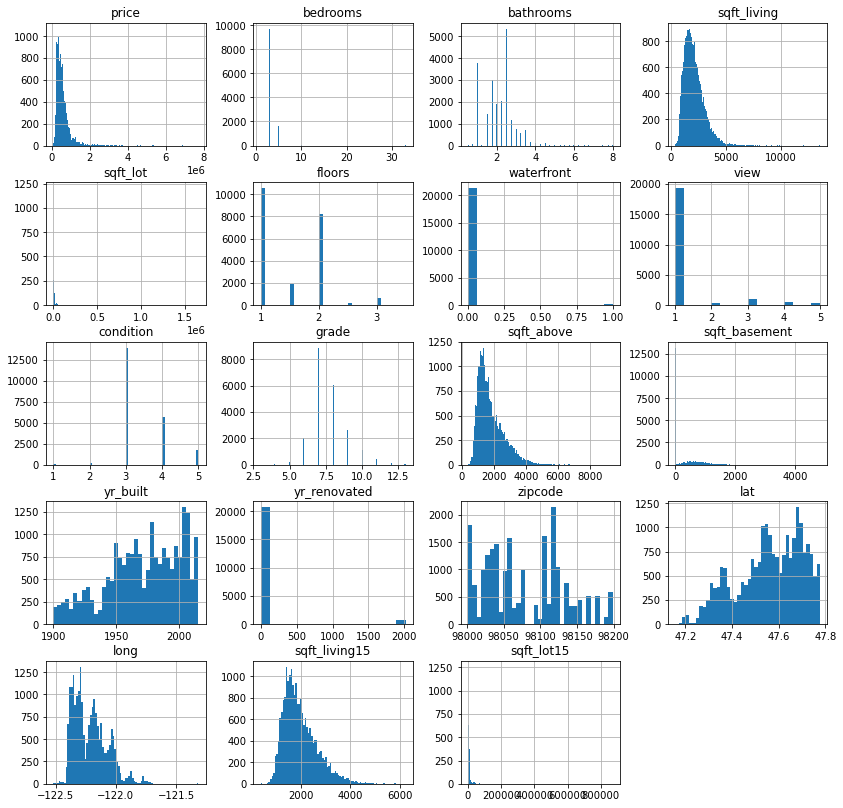

In [41]:
# Check out the distribution of all variables:
df_new.hist(bins='auto', edgecolor='none', figsize=(14,14));

#### The target / dependent variable:
- The sale prices have a negative skew, meaning the majority of the data is in the lower values, and there are fewer very high values. 
- We might also benefit from (log) transforming this variable. 

In [42]:
# Code copied from: https://stackoverflow.com/questions/61330427/set-y-axis-in-millions and modified a bit. 
# Use the function below to get rid of 1e8s etc on graphs and to format numbers in thousands, millions, etc in visualizations..:

from matplotlib.ticker import FuncFormatter

def human_format(num, pos):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '$%.0f%s' % (num, ['', 'K', 'M', 'B', 'T', 'P'][magnitude])

formatter = FuncFormatter(human_format)

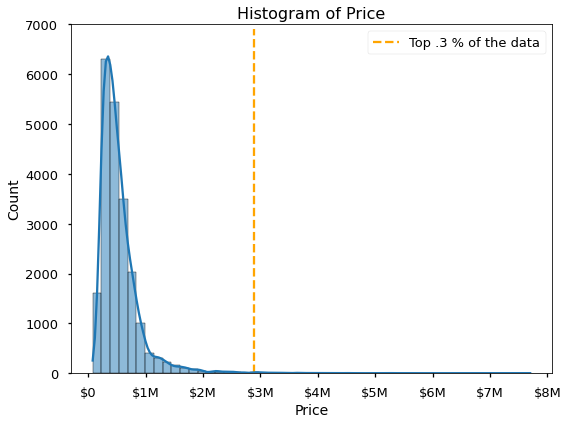

In [43]:
# Histogram of Price:
with plt.style.context('seaborn-talk'):
    fig, ax  = plt.subplots(figsize=(8, 6))

    sns.histplot(x = df_new['price'], bins=50, ax=ax, kde =True)
    ax.xaxis.set_major_formatter(formatter)
    plt.ylim(0, 7000)
    ax.set_title('Histogram of Price', fontsize=16)
    ax.set_xlabel("Price", fontsize=14)
    ax.set_ylabel("Count", fontsize=14)
    ax.vlines(df['price'].quantile(0.997), 0, 6900, color= 'orange', linestyle='--', label = "Top .3 % of the data")
    ax.legend(loc = 'upper right')
    fig.tight_layout();
    
    fig.savefig('./images/Histogram_DependentMeasure.png', dpi=300)

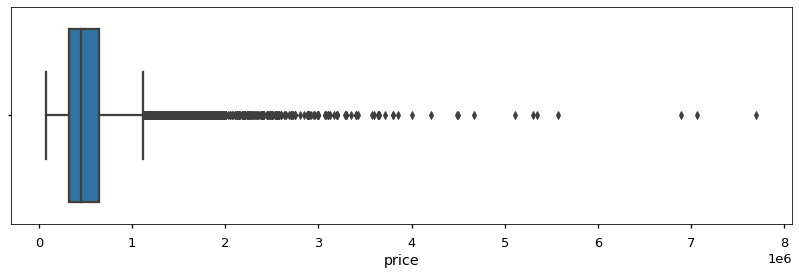

In [44]:
# Boxplot of Price:
with plt.style.context('seaborn-talk'):
    fig, ax  = plt.subplots(figsize=(14, 4))
    sns.boxplot(x = df_new['price'], ax=ax);

#### Remove the extreme outliers from the data:
    
- Since the distribution is highly skewed I will remove the top .3% of the data. 
- We will only be dealing with houses up to ~3M in price. 

In [45]:
# Checking to see what percentage of data we have removed in total:

oldshape = df_new.shape
print(f"oldshape: {oldshape}")

df_new = df_new[(df_new['price'] < df_new['price'].quantile(.997))]
print(f"newshape: {df_new.shape}")
print(oldshape[0] - df_new.shape[0])
print(((oldshape[0] - df_new.shape[0]) *100) /df_new.shape[0])

# We removed only 65 data points and .3 % of data.

oldshape: (21420, 20)
newshape: (21355, 20)
65
0.30437836572231325


#### Log Transform the target variable:

- Price distribution is still highly skewed so let's log transform the variable as well.  

In [46]:
df_new['log_price'] = np.log(df_new['price'])

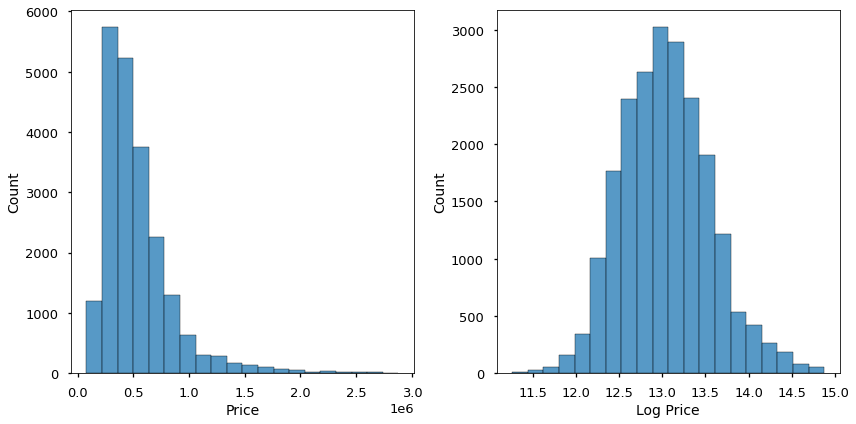

In [47]:
# Price distribution before and after log transformation:

with plt.style.context('seaborn-talk'):

    fig, (ax1, ax2) = plt.subplots(ncols=2,  figsize=(12, 6))
    fig.set_tight_layout(True)

    sns.histplot(x = df_new['price'], ax= ax1, bins=20);
    sns.histplot(x = df_new['log_price'], ax= ax2, bins=20);

    ax1.set_xlabel("Price", fontsize=14)
    ax2.set_xlabel("Log Price", fontsize=14)
    ax1.set_ylabel("Count", fontsize=14)
    ax2.set_ylabel("Count", fontsize=14)

    fig.savefig('./images/price_before_after_log.png', dpi=300);
    

- The price distribution looks NORMAL after log transformation. 

#### Creating a Binary View variable:
- The majority of the houses don't have a view and very few have ratings of 2-5. 
- So let's impute a new variable to indicate whether or not a house has a view. 


In [48]:
df_new['view'].value_counts()

1    19297
3      950
4      499
2      325
5      284
Name: view, dtype: int64

In [49]:
# Regrouping 1 to 0 (no view) and 2-5 into 1 (has view)
dic = {1:0, 2:1 ,3:1 ,4:1 ,5:1}
df_new['has_view'] = df_new['view'].map(dic)
df_new['has_view'].value_counts()

0    19297
1     2058
Name: has_view, dtype: int64

In [50]:
print(df_new.corr()['price']['view'])
print(df_new.corr()['price']['has_view'])

# Let's use `has_view` instead of `view` since the correlation to price is similar and it is more meaningful. 

0.37483613089845086
0.3500682990327732


#### Visualizing Waterfront and View binary variables in relation to price:

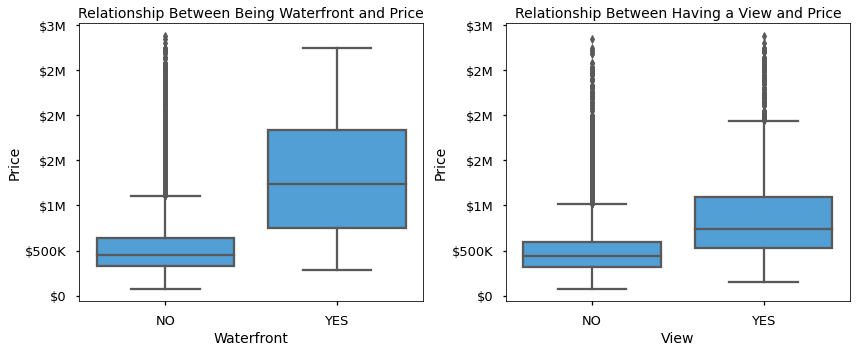

In [51]:
with plt.style.context('seaborn-talk'):
    base_color = sns.color_palette("husl", 9)[6]
    fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows=1, figsize=(12, 5))
    fig.set_tight_layout(True)

    sns.boxplot(x="waterfront", y="price", ax=ax1, data=df_new, color = base_color) 
    ax1.yaxis.set_major_formatter(formatter)
    ax1.set_xticklabels(labels=['NO', 'YES'])
    ax1.set_title('Relationship Between Being Waterfront and Price', fontsize=14)
    ax1.set_xlabel("Waterfront",fontsize=14)
    ax1.set_ylabel("Price",fontsize=14)
    
    sns.boxplot(x="has_view", y="price", ax=ax2, data=df_new, color = base_color) 
    ax2.yaxis.set_major_formatter(formatter)
    ax2.set_xticklabels(labels=['NO', 'YES'])
    ax2.set_title('Relationship Between Having a View and Price', fontsize=14)
    ax2.set_xlabel("View",fontsize=14)
    ax2.set_ylabel("Price",fontsize=14)

    fig.savefig('./images/view_waterfront _to_Price.png', dpi=300);

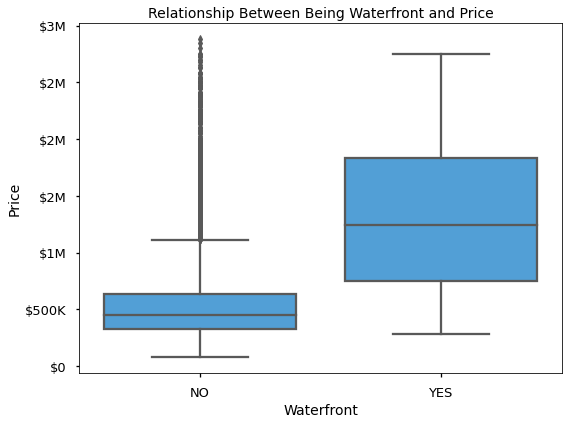

In [52]:
# Extra graph for the presentation only. 
with plt.style.context('seaborn-talk'):
    base_color = sns.color_palette("husl", 9)[6]
    fig, (ax) = plt.subplots(figsize=(8, 6))
    fig.set_tight_layout(True)

    sns.boxplot(x="waterfront", y="price", ax=ax, data=df_new, color = base_color) 
    ax.yaxis.set_major_formatter(formatter)
    ax.set_xticklabels(labels=['NO', 'YES'])
    ax.set_title('Relationship Between Being Waterfront and Price', fontsize=14)
    ax.set_xlabel("Waterfront",fontsize=14)
    ax.set_ylabel("Price",fontsize=14)

    fig.savefig('./images/waterfront _to_Price.png', dpi=300);

#### Creating a Month variable:

- Date a house is sold cannot be significant in predicting house price so I will add a `month` column to indicate which month of the year the house was sold and drop the date. 

In [53]:
df_new['month'] = pd.to_datetime(df_new['date']).dt.month
df_new.drop(columns=['date'], inplace = True, axis=1)

In [54]:
median_month = pd.DataFrame(df_new.groupby('month')['price'].median())  # median because price is skewed 
median_month

,price
month,
1,440000.0
2,426045.0
3,450000.0
4,475000.0
5,462000.0
6,465000.0
7,469000.0
8,444000.0
9,450000.0


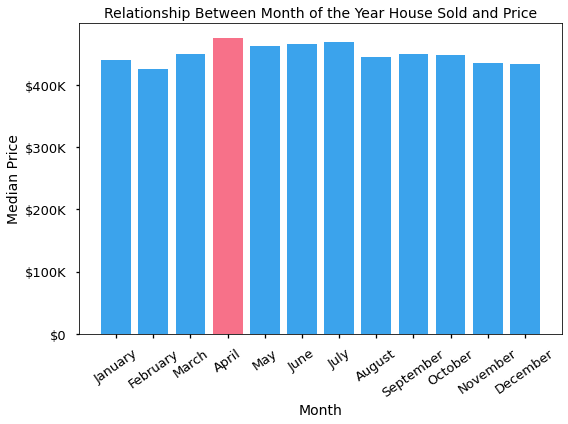

In [55]:
# Barplot of median house price for each month:

median_month = pd.DataFrame(df_new.groupby('month')['price'].median())  # median because price is skewed 

with plt.style.context('seaborn-talk'):
    colors = [sns.color_palette("husl", 9)[0] if month == 4 else sns.color_palette("husl", 9)[6] for month in median_month.index]
    fig, ax  = plt.subplots(figsize=(8, 6))
    #sns.barplot(x = mean_month.index, y= mean_month['price'], ax=ax, color = base_color)
    bars = plt.bar(x=median_month.index, height=median_month['price'], color = colors)
    plt.xticks(np.arange(1, 13, 1))
    ax.set_xticklabels(labels=['January', 'February', 'March', 'April',
                               'May', 'June', 'July', 'August',
                              'September', 'October', 'November', 'December'], rotation = 35)
    ax.yaxis.set_major_formatter(formatter)
    ax.set_title('Relationship Between Month of the Year House Sold and Price',fontsize=14)
    ax.set_xlabel("Month",fontsize=14)
    ax.set_ylabel("Median Price",fontsize=14)
    fig.tight_layout();

    fig.savefig('./images/month_price-relationship.png', dpi=300);

- Replacing month number with month name, so that the 'month name' would appear as the 'column name' when we dummy code this variable:

In [56]:
# Replacing month number with month name:
dic = {1: 'january', 2:'february',3:'march',4:'april',5:'may',
       6:'june',7:'july',8:'august',9:'september',
       10:'october',11:'november',12:'december'}

df_new.replace({"month": dic}, inplace=True)

#### Dummy coding `month` variable:
- Months appear as distinct categories with no meaningful numerical relationship to one another.

In [57]:
month_dummies = pd.get_dummies(df_new['month']).drop(['january'], axis=1)
df_new = pd.concat([df_new, month_dummies], axis=1)
df_new = df_new.drop(['month'], axis=1)
df_new.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,august,december,february,july,june,march,may,november,october,september
0,221900.0,3,1.00,1180,5650,1.0,0,1,3,7,...,0,0,0,0,0,0,0,0,1,0
1,538000.0,3,2.25,2570,7242,2.0,0,1,3,7,...,0,1,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0,1,3,6,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,1,5,7,...,0,1,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,1,3,8,...,0,0,1,0,0,0,0,0,0,0


#### Creating an age related variable:

- Let's create a new variable called `age` to represent the age of an house from the time it was built or renovated using `yr_built` and `yr_renovated`. 

In [58]:
# Because all houses were sold in 2014 and 2015 we will take 2015 as the current year. 

df_new['age'] = 2015 - df_new['yr_built'] # Set all age based on yr_built initially. 
mask = df_new['yr_renovated'] != 0 # create a mask for those rows with a value in yr_renovated.
df_new.loc[mask, "age"] = (2015 - df_new['yr_renovated']) # Set age based on yr_renovation where the mask condition is true

-0.09219731443044772


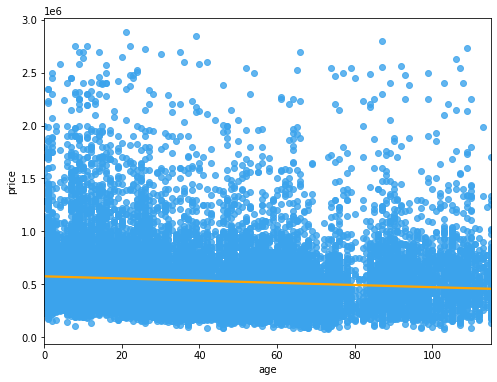

In [59]:
fig, ax = plt.subplots(figsize=(8, 6))
base_color = sns.color_palette("husl", 9)[6]
sns.regplot(x="age", y="price", ax=ax, data=df_new, color = base_color, line_kws={"color": "orange"})
print(df_new.corr()['price']['age'])

# not much of a correlation but let's still keep this variable. 

- Let's create a new binary variable `age<30` where we group older versus younger houses. 
- We pick age 30 as the criterion for a house that most likely needs repair. 

In [60]:
# Creating a new binary variable `age<30` ro represent houses younger and older than 30 years. 
df_new['age<30'] = df_new['age'] < 30
df_new['age<30'].value_counts()

False    12809
True      8546
Name: age<30, dtype: int64

In [61]:
# Renaming True and False with 0 and 1. 
dic = {False:"0", True:"1"}
df_new.replace({"age<30": dic}, inplace=True)
df_new["age<30"] = df_new["age<30"].astype(int)
df_new["age<30"].value_counts()

0    12809
1     8546
Name: age<30, dtype: int64

In [62]:
print(df_new.corr()['price']['age'])
print(df_new.corr()['price']['age<30']) 

-0.09219731443044772
0.16020160020637306


- Improvement in correlation with price when we binary code the age variable. Let's pick `age<30` over `age`. 

In [63]:
# Dropping unnecessary columns:
df_new = df_new.drop(['yr_built', 'yr_renovated', 'view'], axis=1)

#### Creating a location based variable:

- There are 70 Zipcodes! Too many levels if we go for One Hot Encoding.
- We cannot leave it as label encoded either, zip numbers do not have a meaningful numerical relationship to one another. 
- I will engineer a new "location" variable with more meaningful categorical distinctions using Longitude-Latitude - I will then dummy code this variable. 


In [64]:
# Creating a dataframe to show median price for each Zipcode. 
zipmedians = df_new.groupby('zipcode')['price'].median().sort_values(ascending=False)
zipmedians = pd.DataFrame(zipmedians).reset_index()
zipmedians.head()

,zipcode,price
0,98039,1780000.0
1,98004,1100000.0
2,98040,990000.0
3,98112,897500.0
4,98005,765475.0


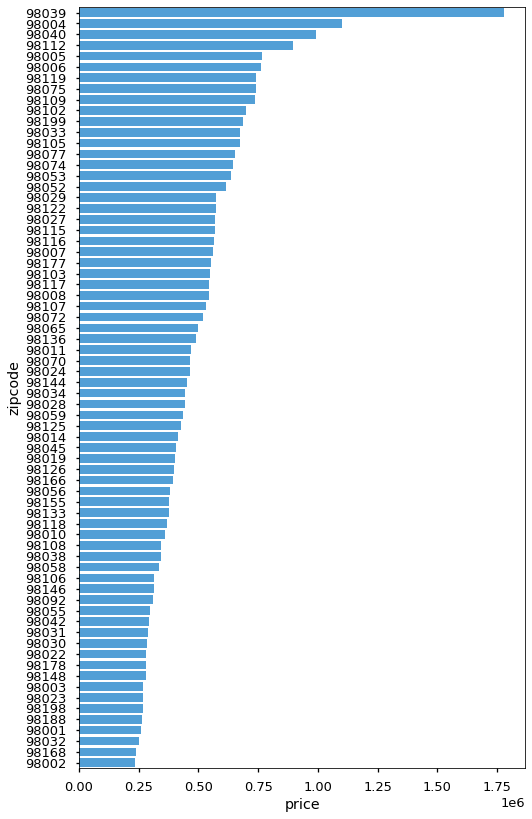

In [65]:
# Plotting the median price for each zipcode: 
with plt.style.context('seaborn-talk'):
    base_color = sns.color_palette("husl", 9)[6]
    fig, ax  = plt.subplots(figsize=(8, 14))
    sns.barplot(x = zipmedians['price'], y= zipmedians['zipcode'],  
                order = zipmedians.sort_values('price',ascending = False).zipcode, ax=ax, color = base_color, orient = "h")


The most expensive 4 zipcodes: 
- Medina, Bellevue, Mercer Island and Seattle

#### Upload city data to be able to superimpose on the map:

- Upload US Zip Codes Database [here](https://simplemaps.com/data/us-zips) which contains `city` info in relation to `zipcodes`:


In [66]:
# Read the data:
dfzip = pd.read_csv("./data/uszips.csv")
dfzip.head()

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18027,-66.75266,Adjuntas,PR,Puerto Rico,True,NaN,16773.0,100.5,72001,Adjuntas,"{""72001"": 98.76, ""72141"": 1.24}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36075,-67.17541,Aguada,PR,Puerto Rico,True,NaN,37083.0,472.1,72003,Aguada,"{""72003"": 100}",Aguada,72003,False,False,America/Puerto_Rico
2,603,18.45744,-67.12225,Aguadilla,PR,Puerto Rico,True,NaN,45652.0,513.2,72005,Aguadilla,"{""72005"": 99.76, ""72099"": 0.24}",Aguadilla|Moca,72005|72099,False,False,America/Puerto_Rico
3,606,18.16585,-66.93716,Maricao,PR,Puerto Rico,True,NaN,6231.0,54.3,72093,Maricao,"{""72093"": 82.28, ""72153"": 11.67, ""72121"": 6.05}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29110,-67.12243,Anasco,PR,Puerto Rico,True,NaN,26502.0,275.7,72011,Añasco,"{""72011"": 96.71, ""72099"": 2.81, ""72083"": 0.37,...",Añasco|Moca|Las Marías|Aguada,72011|72099|72083|72003,False,False,America/Puerto_Rico


In [67]:
# subsetting the dataset to include those cities in KingCounty only:
dfzip = dfzip[(dfzip['county_names_all'].str.contains('King')) & (dfzip['state_id'] == 'WA') ]
print(dfzip.zip.nunique())
dfzip

89


,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
32938,98001,47.30919,-122.26426,Auburn,WA,Washington,True,NaN,34455.0,713.9,53033,King,"{""53033"": 100}",King,53033,False,False,America/Los_Angeles
32939,98002,47.30820,-122.21567,Auburn,WA,Washington,True,NaN,33947.0,1829.6,53033,King,"{""53033"": 100}",King,53033,False,False,America/Los_Angeles
32940,98003,47.30596,-122.31465,Federal Way,WA,Washington,True,NaN,49445.0,1659.9,53033,King,"{""53033"": 100}",King,53033,False,False,America/Los_Angeles
32941,98004,47.61865,-122.20548,Bellevue,WA,Washington,True,NaN,37265.0,1979.1,53033,King,"{""53033"": 100}",King,53033,False,False,America/Los_Angeles
32942,98005,47.61494,-122.16814,Bellevue,WA,Washington,True,NaN,21414.0,1126.7,53033,King,"{""53033"": 100}",King,53033,False,False,America/Los_Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33031,98199,47.65139,-122.40223,Seattle,WA,Washington,True,NaN,23444.0,2137.3,53033,King,"{""53033"": 100}",King,53033,False,False,America/Los_Angeles
33041,98224,47.73570,-121.56859,Baring,WA,Washington,True,NaN,243.0,1.5,53033,King,"{""53033"": 100}",King,53033,False,False,America/Los_Angeles
33092,98288,47.65204,-121.35740,Skykomish,WA,Washington,True,NaN,225.0,0.3,53033,King,"{""53033"": 100}",King,53033,False,False,America/Los_Angeles
33132,98354,47.25113,-122.31557,Milton,WA,Washington,True,NaN,7551.0,1029.0,53053,Pierce,"{""53053"": 80.02, ""53033"": 19.98}",Pierce|King,53053|53033,False,False,America/Los_Angeles


In [68]:
# For cities with multiple zipcodes find an average latitude and longitude value:
dfzip_table = dfzip.groupby('city')[['lat', 'lng']].mean()
dfzip_table = dfzip_table.reset_index()
dfzip_table

,city,lat,lng
0,Auburn,47.301967,-122.203720
1,Baring,47.735700,-121.568590
2,Bellevue,47.602148,-122.155832
3,Black Diamond,47.311730,-122.003260
4,Bothell,47.757360,-122.198710
5,Carnation,47.696640,-121.840240
6,Duvall,47.740830,-121.934940
7,Enumclaw,47.171400,-121.679580
8,Fall City,47.573010,-121.902190
9,Federal Way,47.307385,-122.338315


- We have a total of 32 cities in KingCounty WA which we can superimpose on the map below:

In [69]:
# For the purpose of graphing only remove far east cities of Baring, Skykomish, Snoqualmie Pass:
dfzip_table.drop(index=[1,27,29], axis=0, inplace=True)

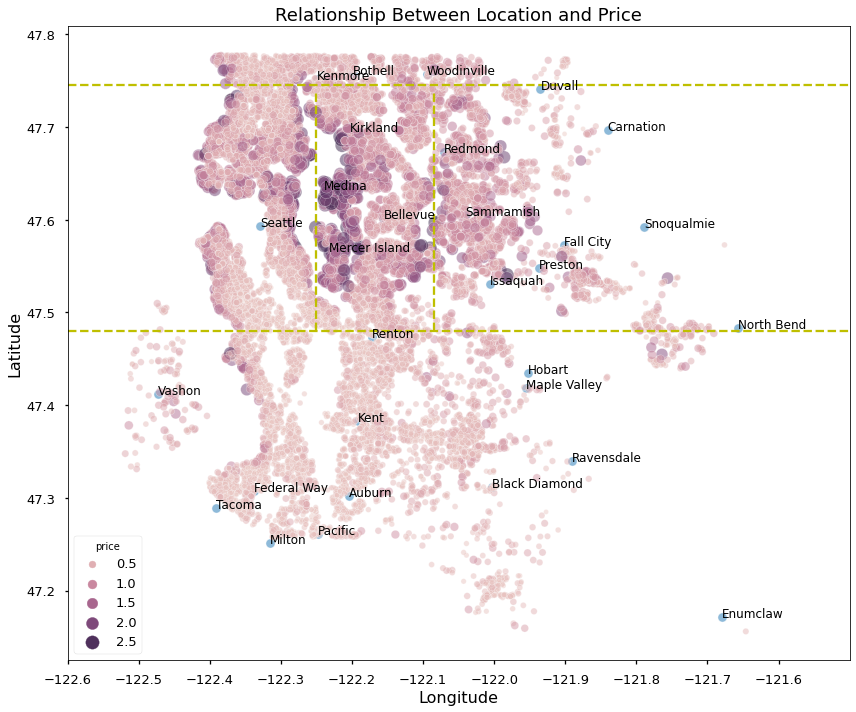

In [70]:
# Scatterplot of longitude and latitude with a hue of price, city names are superimposed to the map:
# Superimposed data is from: https://www.communitiescount.org/king-county-geographies
# The shape is the shape of King County, WA

with plt.style.context('seaborn-talk'):
    
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.scatterplot(data=dfzip_table, x='lng', y='lat',  alpha = .5, ax=ax)
    [plt.text(x=row['lng'], y=row['lat'], s=row['city'], size='large', color='black') for k,row in dfzip_table.iterrows()]

    sns.scatterplot(data=df_new, x='long', y='lat', hue='price', size="price",sizes=(20, 200),  alpha = .5, ax=ax) 
    ax.axhline(y= 47.48, xmin=0, xmax=1, color='y', linestyle='--')
    ax.axvline(x= -122.25, ymin=0.52, ymax=0.9, color='y', linestyle='--')
    ax.axvline(x= -122.085, ymin=0.52, ymax=0.9, color='y', linestyle='--')
    ax.axhline(y= 47.745, xmin=0, xmax=1, color='y', linestyle='--')
    plt.xticks(np.arange(-122.6, -121.5, 0.1))
    
    plt.xlim(-122.6, -121.5)
    ax.set_title('Relationship Between Location and Price',fontsize=18)
    ax.set_xlabel("Longitude",fontsize=16)
    ax.set_ylabel("Latitude",fontsize=16)
    fig.tight_layout();
    
    fig.savefig('./images/LocationMap.png', dpi=300);


#### Extract 5 regions based on coordinates: 

- North - Kenmore, Bothell, Woodinville
- East - Medina, Bellevue, Mercer Island and Kirkland
- Far East - Redmond, Sammamish etc. 
- West - Seattle.
- South - Tacoma, Renton, Kent etc.

In [71]:
# Group latitude and longitude togetger to create a new variable called `coordinates`
df_new['coordinates'] = list(zip(df_new.lat, df_new.long))

# Write a function to extract the region information based on coordinates
def region(coordinate):
    if (coordinate[0] > 47.745):
        return 'north'
    elif (coordinate[0] > 47.48) and (coordinate[0] < 47.745) and (coordinate[1] < -122.25):
        return 'west'
    elif (coordinate[0] > 47.48) and (coordinate[0] < 47.745) and (coordinate[1] > -122.25) and  (coordinate[1] < -122.085):
        return 'east'
    elif (coordinate[0] > 47.48) and (coordinate[0] < 47.745) and (coordinate[1] > -122.085): 
        return 'fareast'
    else:
        return 'south'

region([47.5112, -122.257])

'west'

In [72]:
# Apply the function on the coordinates to come up with a new variable called `region`:
df_new['region'] = df_new['coordinates'].apply(region)
df_new['region'].head()

0       west
1       west
2       east
3       west
4    fareast
Name: region, dtype: object

In [73]:
# Check out median price for each region:
df_new.groupby('region')['price'].median()

region
east       582250.0
fareast    585000.0
north      437000.0
south      299900.0
west       490000.0
Name: price, dtype: float64

In [74]:
df_new['region'].value_counts()

west       7344
south      5661
east       4448
fareast    2665
north      1237
Name: region, dtype: int64

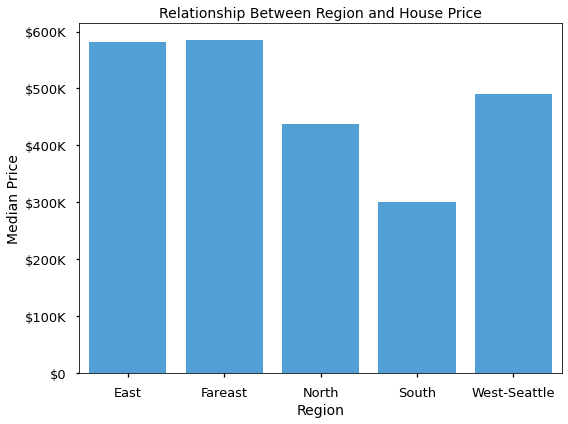

In [75]:
# Extract DataFrame of Median price for each region:
median_region = pd.DataFrame(df_new.groupby('region')['price'].median())  # median because price is skewed 

# Plot as a bar plot:
with plt.style.context('seaborn-talk'):
    base_color = sns.color_palette("husl", 9)[6]
    fig, ax  = plt.subplots(figsize=(8, 6))
    sns.barplot(x = median_region.index, y= median_region['price'], ax=ax, color = base_color)
    ax.set_xticklabels(labels=['East', 'Fareast', 'North', 'South', 'West-Seattle'])
    ax.yaxis.set_major_formatter(formatter)
    ax.set_title('Relationship Between Region and House Price',fontsize=14)
    ax.set_xlabel("Region",fontsize=14)
    ax.set_ylabel("Median Price",fontsize=14)
    fig.tight_layout();

    fig.savefig('./images/region_price-relationship.png', dpi=300);

- East regions appear as the most expensive area, followed by Seattle and then north. South is the cheapest. 

#### Dummy code `region`:

In [76]:
# South region is the reference point:
region_dummies = pd.get_dummies(df_new['region']).drop(['south'],axis=1)
df_new = pd.concat([df_new, region_dummies], axis=1)
df_new.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,...,october,september,age,age<30,coordinates,region,east,fareast,north,west
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,...,1,0,60.0,0,"(47.5112, -122.257)",west,0,0,0,1
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,...,0,0,24.0,1,"(47.721, -122.319)",west,0,0,0,1
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,...,0,0,82.0,0,"(47.7379, -122.233)",east,1,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,...,0,0,50.0,0,"(47.5208, -122.393)",west,0,0,0,1
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,...,0,0,28.0,1,"(47.6168, -122.045)",fareast,0,1,0,0


In [77]:
# Drop unnecessary variables:
df_new = df_new.drop(['region','coordinates', 'zipcode'], axis=1)

## Feature Engineering Continued:

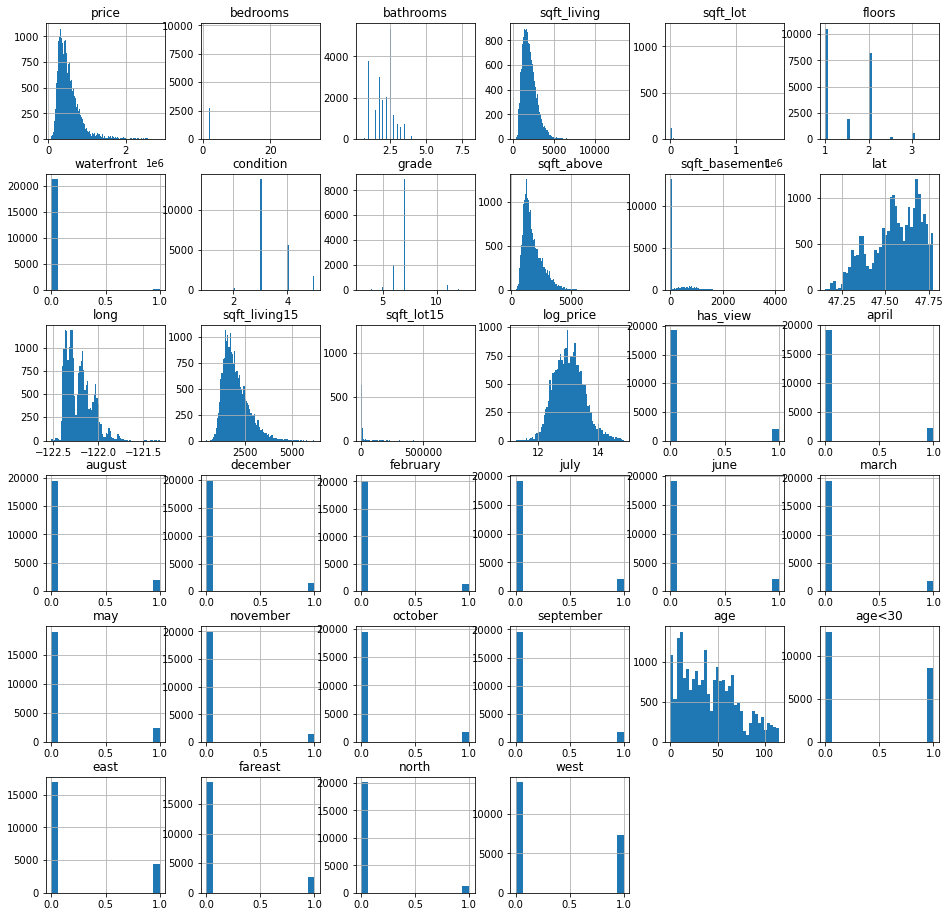

In [78]:
df_new.hist(bins='auto', edgecolor='none', figsize=(16,16));

#### Remove outliers from `bedrooms` and `bathrooms`:

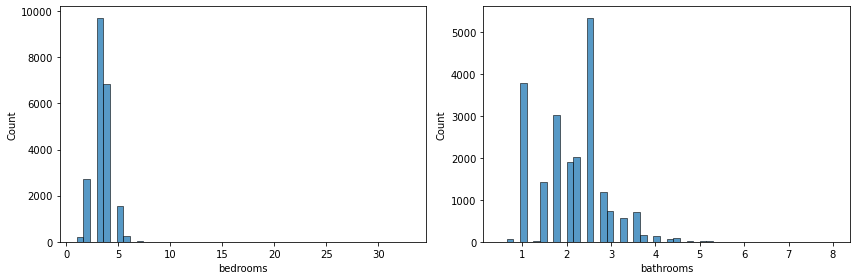

In [79]:
# Histogram of bathrooms and bedrooms:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
fig.set_tight_layout(True)

sns.histplot(x = df_new['bedrooms'], ax= ax1, bins=50);
sns.histplot(x = df_new['bathrooms'], ax =ax2, bins=50);  

# There are outliers in both bathrooms and bedrooms.

In [80]:
df_new['bedrooms'].describe()

count    21355.000000
mean         3.370265
std          0.922473
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [81]:
df_new['bathrooms'].describe()

count    21355.000000
mean         2.111672
std          0.757100
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [82]:
# Let's check out what value the top .1 percent of the data corresponds to:
print(df_new['bedrooms'].quantile(.999))
print(df_new['bathrooms'].quantile(.999))

8.0
5.25


In [83]:
# Let's remove some very high values visible in the histogram ~ top .1 percent. 
df_new =  df_new[df_new['bedrooms'] < 8]
df_new =  df_new[df_new['bathrooms'] < 6]

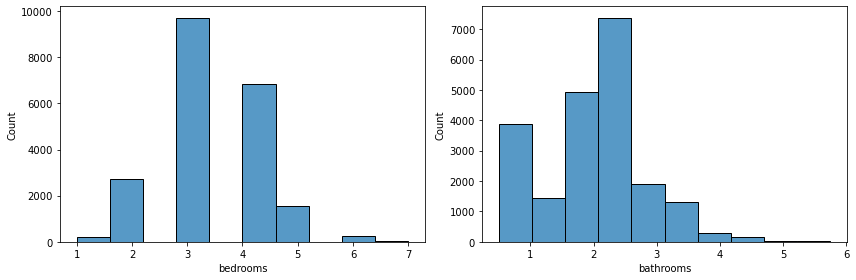

In [84]:
# Check out the histograms after removing the outliers:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
fig.set_tight_layout(True)

sns.histplot(x = df_new['bedrooms'], ax= ax1, bins=10);
sns.histplot(x = df_new['bathrooms'], ax =ax2, bins=10);  


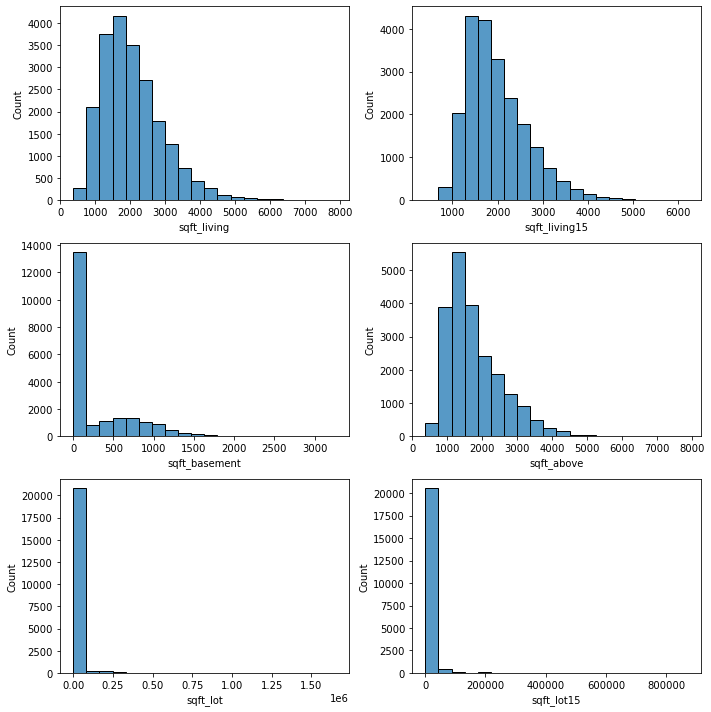

In [85]:
# Check out the distribution of other area related numerical variables:

fig, ((ax1, ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(ncols=2, nrows=3, figsize=(10, 10))
fig.set_tight_layout(True)

sns.histplot(x = df_new['sqft_living'], ax= ax1, bins=20);
sns.histplot(x = df_new['sqft_living15'], ax= ax2, bins=20);
sns.histplot(x = df_new['sqft_basement'], ax =ax3, bins=20); 
sns.histplot(x = df_new['sqft_above'], ax= ax4, bins=20);
sns.histplot(x = df_new['sqft_lot'], ax =ax5, bins=20); 
sns.histplot(x = df_new['sqft_lot15'], ax= ax6, bins=20);

# Lots of outliers in sqft_lot and sqft_lot15

#### What if we use IQR to come up with an upper cutoff value for `sqft_lot?`:

In [86]:
df_new['sqft_lot'].describe()

count    2.132600e+04
mean     1.507740e+04
std      4.151363e+04
min      5.200000e+02
25%      5.038500e+03
50%      7.600000e+03
75%      1.062500e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [87]:
# What value would we use as cutoff using IQR:
Q1 = df_new['sqft_lot'].quantile(0.25)
Q3 = df_new['sqft_lot'].quantile(0.75)
IQR = Q3 - Q1
print(Q3 + (1.5 * IQR))

19004.75


In [88]:
# What percentile does this score correspond to?:
stats.percentileofscore(df_new['sqft_lot'], 19004, kind='rank')

88.82115727281253

- If we use IQR to exclude the high values we would be removing 11% of the data which is A LOT! 
- Let's adopt another criteria to remove a smaller upper portion of the data:

In [89]:
print(stats.percentileofscore(df_new['sqft_lot'], 100000, kind='rank'))
print(stats.percentileofscore(df_new['sqft_lot15'], 100000, kind='rank'))
# If we remove those values above 100000 sqft, we would be removing about top 2% of the data. 

97.84300853418362
98.41976929569539


#### Remove outliers from `sqft_lot`, and `sqft_lot15`:

In [90]:
# Remove some high values from sqft_lot and sqft_lot15
df_new =  df_new[df_new['sqft_lot'] < 100000]  
df_new =  df_new[df_new['sqft_lot15'] < 100000]

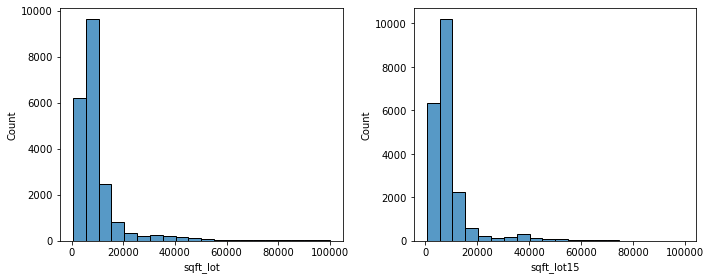

In [91]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
fig.set_tight_layout(True)

sns.histplot(x = df_new['sqft_lot'], ax= ax1, bins=20);
sns.histplot(x = df_new['sqft_lot15'], ax= ax2, bins=20);

#### Create a new `sqft_basement` variable:
- `has_basement` will define precence or absence of `sqft_basement` since more than half of the houses don't have a basement.

In [92]:
# What proportion of data has NO basement?
(len(df_new[df_new['sqft_basement'] == 0]) *100 )/  len(df_new['sqft_basement'])                                                     

61.38013945660015

In [93]:
# Impute the new variable `has_basement` to describe whether or not a house has basement:
df_new['has_basement'] = df_new['sqft_basement'] > 0
df_new['has_basement'].value_counts()

False    12764
True      8031
Name: has_basement, dtype: int64

In [94]:
# Renaming False and True to 0 and 1:
dic = {False:"0", True:"1"}
df_new.replace({"has_basement": dic}, inplace=True)
df_new["has_basement"] = df_new["has_basement"].astype(int)
df_new["has_basement"].value_counts()

0    12764
1     8031
Name: has_basement, dtype: int64

In [95]:
print(df_new.corr()['price']['sqft_basement'])
print(df_new.corr()['price']['has_basement']) 

# correlation coef is smaller for `has_basement` 
# but since this variable is more meaningful let's use it and drop 'sqft_basement'

0.3001634928370975
0.18426400416449712


In [96]:
df_new.drop('sqft_basement', axis=1, inplace=True ) 

#### Log transform skewed variables in case we need to use them in regression:

In [97]:
# Create log_transformed version of the variables below:
for var in ['sqft_living','sqft_living15','sqft_above','sqft_lot','sqft_lot15']: 
    df_new[f"log_"+var] = np.log(df_new[var])  # df_new[f"log{var}"] = np.log(df_new[var])

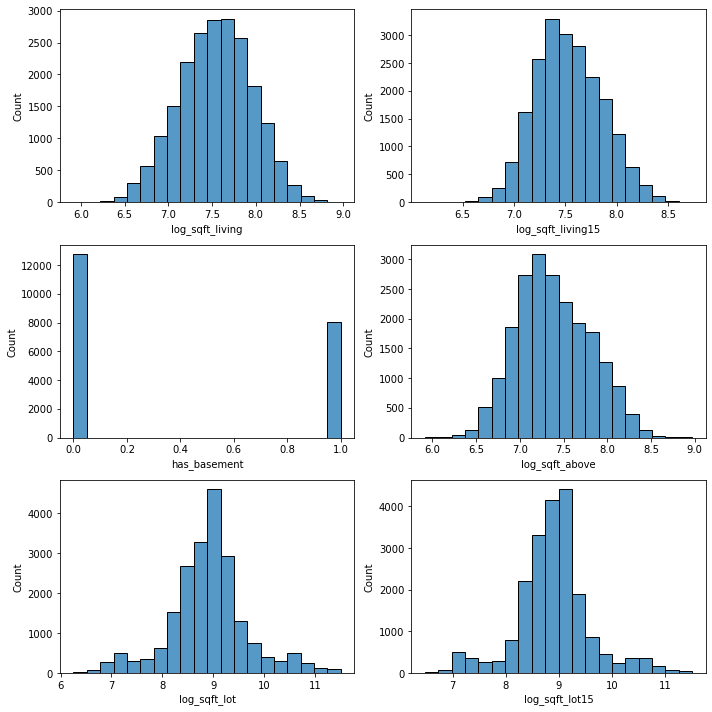

In [98]:
# Plot the log_transformed variables (except has_basement which is binary):
fig, ((ax1, ax2),(ax3, ax4),(ax5,ax6)) = plt.subplots(ncols=2, nrows=3, figsize=(10, 10))
fig.set_tight_layout(True)

sns.histplot(x = df_new['log_sqft_living'], ax= ax1, bins=20);
sns.histplot(x = df_new['log_sqft_living15'], ax= ax2, bins=20);
sns.histplot(x = df_new['has_basement'], ax= ax3, bins=20);
sns.histplot(x = df_new['log_sqft_above'], ax= ax4, bins=20);
sns.histplot(x = df_new['log_sqft_lot'], ax =ax5, bins=20); 
sns.histplot(x = df_new['log_sqft_lot15'], ax= ax6, bins=20);

- The log transformed versions looks NORMAL now. 

In [99]:
# Print the shape before and after data engineering:

print(df.shape)
print(df_new.shape)

(21420, 21)
(20795, 39)


#### In the end we lost ~ 2.9% of the data during data engineering process:

In [100]:
total_dataloss = ((df_fixed.shape[0] - df_new.shape[0]) * 100 ) /  df_fixed.shape[0]
total_dataloss

2.917833800186741

## Feature Selection:

In [101]:
data = df_new.copy()
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,...,east,fareast,north,west,has_basement,log_sqft_living,log_sqft_living15,log_sqft_above,log_sqft_lot,log_sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,...,0,0,0,1,0,7.073270,7.200425,7.073270,8.639411,8.639411
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,...,0,0,0,1,1,7.851661,7.432484,7.682482,8.887653,8.941022
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,...,1,0,0,0,0,6.646391,7.908387,6.646391,9.210340,8.994917
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,...,0,0,0,1,1,7.580700,7.215240,6.956545,8.517193,8.517193
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,...,0,1,0,0,0,7.426549,7.495542,7.426549,8.997147,8.923058


In [102]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'log_price', 'has_view', 'april',
       'august', 'december', 'february', 'july', 'june', 'march', 'may',
       'november', 'october', 'september', 'age', 'age<30', 'east', 'fareast',
       'north', 'west', 'has_basement', 'log_sqft_living', 'log_sqft_living15',
       'log_sqft_above', 'log_sqft_lot', 'log_sqft_lot15'],
      dtype='object')

### HEATMAP:

- Create a correlation matrix to see the intercorrelation of all variables:

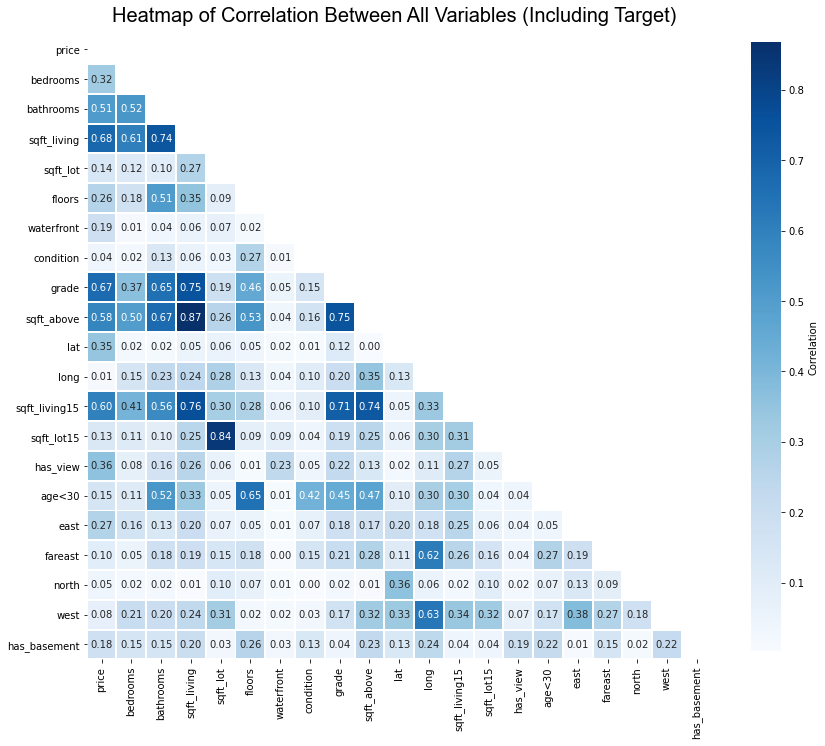

In [103]:
variables = data[[ 'price', 'bedrooms',  'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 
       'lat', 'long', 'sqft_living15', 'sqft_lot15',  'has_view',
        'age<30', 'east', 'fareast',
       'north', 'west', 'has_basement']]

corr = variables.corr().abs()

fig, ax=plt.subplots(figsize=(14,14))
matrix = np.triu(corr) # Getting the Upper Triangle of the correlation matrix
cbar_kws={"label": "Correlation", "shrink":0.8}
heatmap = sns.heatmap(data = corr, cmap='Blues', linewidths = 1, square= True,  ax=ax, annot=True, mask=matrix, fmt= ".2f", cbar_kws=cbar_kws) 
fig.suptitle('Heatmap of Correlation Between All Variables (Including Target)', fontsize=20, y=.84, x = .43, fontname='Arial');
heatmap;

fig.savefig('./images/Heatmap_Correlation.png', dpi=300);


#### Write a function to show the most correlated pairs:

In [104]:
def show_corr_pairs(data):
    dataCorr = data.corr().abs()
    dataCorr = dataCorr.mask(np.triu(np.ones(dataCorr.shape)).astype(np.bool)) # convert upper triangle of values to NaN to remove repeated values from the table
    dataCorr = dataCorr.stack().reset_index().sort_values(0, ascending=False) #0 is the column automatically generated by the stacking
    dataCorr = dataCorr[(dataCorr[0]>.7) & (dataCorr[0]<1)]
    dataCorr =  dataCorr.rename(columns = {'level_0': 'var1', 'level_1': 'var2', 0:'corrcoef'})
    return dataCorr


In [105]:
show_corr_pairs(variables)

,var1,var2,corrcoef
39,sqft_above,sqft_living,0.867206
82,sqft_lot15,sqft_lot,0.837811
69,sqft_living15,sqft_living,0.763508
31,grade,sqft_living,0.754432
44,sqft_above,grade,0.746833
5,sqft_living,bathrooms,0.742071
75,sqft_living15,sqft_above,0.735328
74,sqft_living15,grade,0.710579


#### What are mostly inter-correlated variables?:
- `sqft_living` correlates highly with `sqft_above` and `sqft_living`. 
- `sqft_living` correlates highly with `grade` and `bathrooms` too.
- `sqft_lot15` correlates highly with `sqft_lot`.

In [106]:
variables.corr()['price'].map(abs).sort_values(ascending=False) 

price            1.000000
sqft_living      0.684657
grade            0.674439
sqft_living15    0.599341
sqft_above       0.584023
bathrooms        0.506821
has_view         0.357703
lat              0.345269
bedrooms         0.320176
east             0.271447
floors           0.263646
waterfront       0.190387
has_basement     0.184264
age<30           0.151822
sqft_lot         0.137853
sqft_lot15       0.128145
fareast          0.098088
west             0.076611
north            0.045607
condition        0.044216
long             0.013770
Name: price, dtype: float64

#### Which variable correlates highest with `price`?:
- `sqft_living` seems to have the greatest correlation with `price`. 

In [107]:
df_corr = abs(variables.corr()) > 0.7
df_corr.sum()

price            1
bedrooms         1
bathrooms        2
sqft_living      5
sqft_lot         2
floors           1
waterfront       1
condition        1
grade            4
sqft_above       4
lat              1
long             1
sqft_living15    4
sqft_lot15       2
has_view         1
age<30           1
east             1
fareast          1
north            1
west             1
has_basement     1
dtype: int64

#### Which variable has the most number of correlations to other variables?:

- `sqft_living` is the variable with the greatest collinearity to others too.

###  Take away from the Heat Map:

- `sqft_living`, `sqft_above` ,`sqft_living15` correlate highly. Keep `sqft_living` as it correlates with price the highest. 
- `grade` and `bathrooms` also correlate highly with `sqft_living`. But let's keep these variables since they give a different type of information. 
- Do not use `lat` and `long` since they are redundant with location variables.
- `sqft_lot15`and `sqft_lot` correlate highly. Keep `sqft_lot` as it correlates with price a bit more.

## Regression Assumptions Check Functions:

### Linearity:
- There should be a linear relationship between the response/target variable and predictors.
- Check for this once using scatterplots and then visually inspecting the scatterplots for linearity.. 

In [108]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'log_price', 'has_view', 'april',
       'august', 'december', 'february', 'july', 'june', 'march', 'may',
       'november', 'october', 'september', 'age', 'age<30', 'east', 'fareast',
       'north', 'west', 'has_basement', 'log_sqft_living', 'log_sqft_living15',
       'log_sqft_above', 'log_sqft_lot', 'log_sqft_lot15'],
      dtype='object')

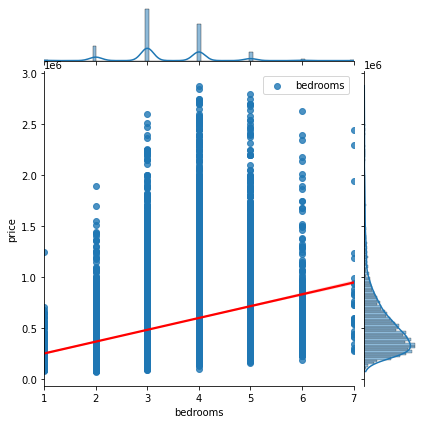

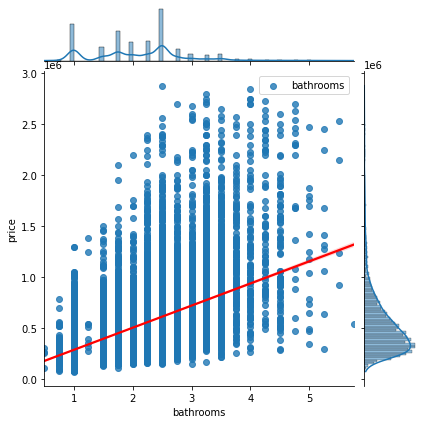

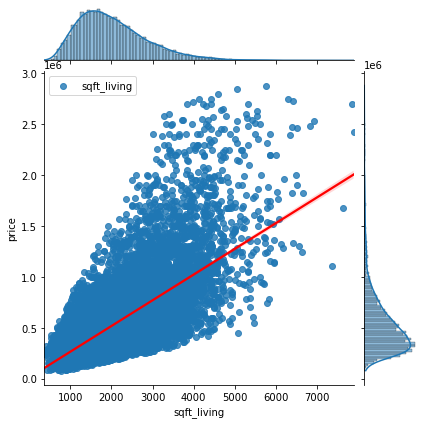

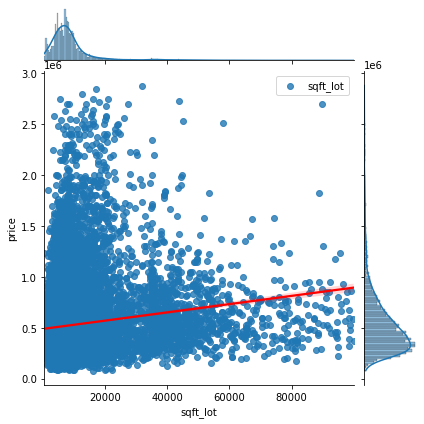

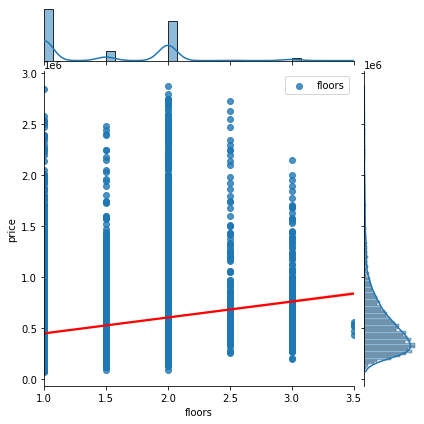

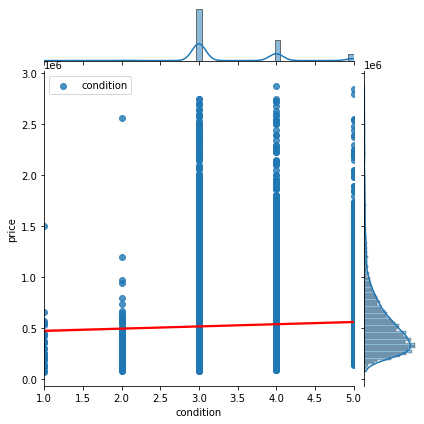

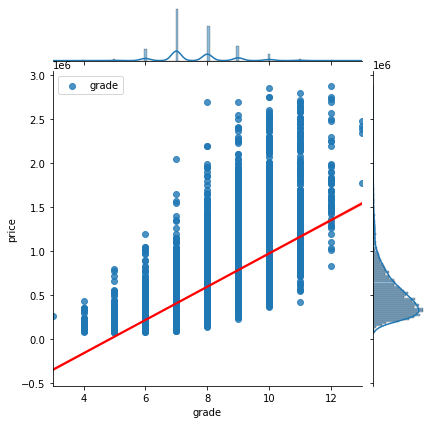

In [109]:
# Linearity against `price`:
continuous = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
              'condition', 'grade']

for column in continuous:
    sns.jointplot(x=column, y="price", data=data, kind='reg', label=column,joint_kws={'line_kws':{'color':'red'}})
    plt.legend()
    plt.show()

- Looks like a linear relationship except `sqft_lot`

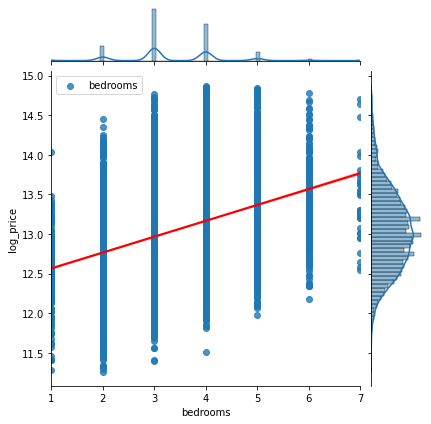

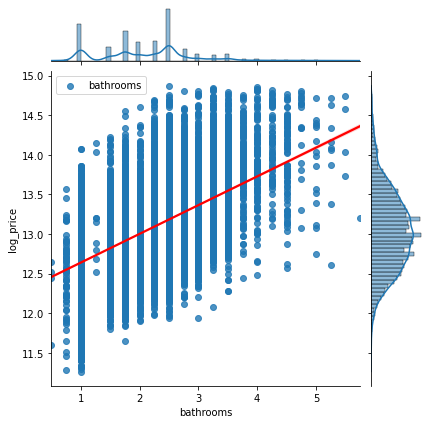

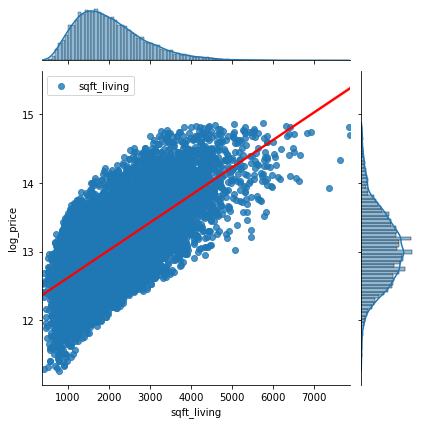

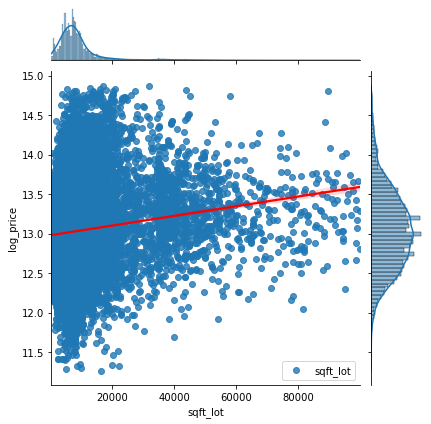

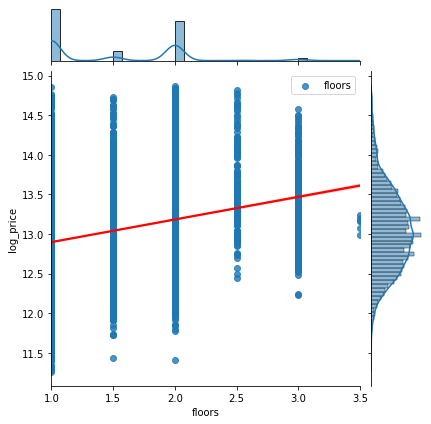

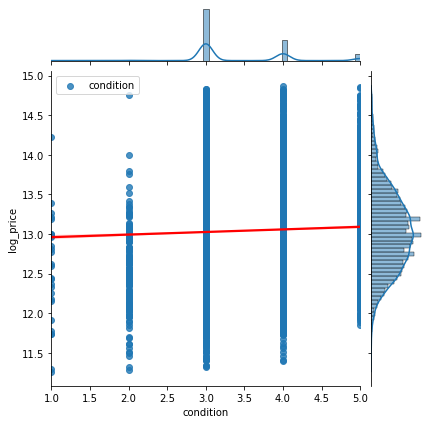

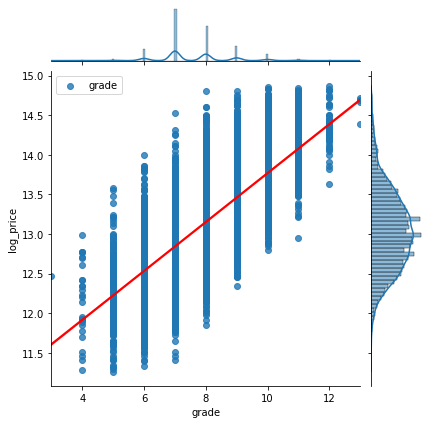

In [110]:
# Linearity against `log_price`:

continuous = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
              'condition', 'grade']

for column in continuous:
    sns.jointplot(x=column, y="log_price", data=data, kind='reg', label=column,joint_kws={'line_kws':{'color':'red'}})
    plt.legend()
    plt.show()

- Looks like a linear realtionship for all variables. 

### Check for Normality and Homoscadescacity:
- The model residuals should follow a normal distribution.
- The residuals should be evenly spread through range (The variance of residual is uniform).

In [111]:
def normality_homoscadescacity(model):
    fig, ((ax1, ax2, ax3)) = plt.subplots(ncols=3,  figsize=(16, 4))
    
    ax1.hist(model.resid_pearson,bins=20,edgecolor='k')
    ax1.set_xlabel("Normalized residuals",fontsize=14)
    ax1.set_ylabel("Count",fontsize=14)
    ax1.set_title("Histogram of normalized residuals (NORMALITY)", fontsize =11)

    from statsmodels.graphics.gofplots import qqplot
    qqplot(model.resid_pearson, line='45', fit='True', ax = ax2, alpha=0.8, markerfacecolor='#1f77b4')
    ax2.set_xlabel("Theoretical quantiles",fontsize=14)
    ax2.set_ylabel("Ordered Values",fontsize=14)
    ax2.set_title("Q-Q plot of normalized residuals (NORMALITY)", fontsize =11)
    
    ax3.scatter(x=model.fittedvalues, y=model.resid)
    xmin=min(model.fittedvalues)
    xmax = max(model.fittedvalues)
    plt.hlines(y=0,xmin=xmin,xmax=xmax,color='red',linestyle='--',lw=3)
    ax3.set_xlabel("Fitted values",fontsize=14)
    ax3.set_ylabel("Residuals",fontsize=14)
    ax3.set_title("Fitted vs. residuals plot (HOMOSCADESCACITY)", fontsize =11)
    plt.grid(True)
    
    return(ax)

### Check for absence of multicollinearity:

- Multicollinearity occurs when 2 or more of the independent variables are highly correlated with each other.
- VIF (variance inflation factor) is a measure for the increase of the variance of the parameter estimates if an additional variable is added to the linear regression.
- If VIF is greater than 5, then the explanatory variable is highly collinear with another explanatory variable. 

In [112]:
#https://github.com/cwf231/linear_regression_guided_practice
from statsmodels.stats.outliers_influence import variance_inflation_factor

def create_vif_dictionary(X):
    vif_dct = {}
    for i in range(len(X.columns)): # Loop through each row and set the variable name to the VIF. 
        vif = variance_inflation_factor(X.values, i) # Calculate VIF
        v = X.columns[i] # Extract column name for dictionary key.
        vif_dct[v] = vif # Set value in dictionary.
    return vif_dct

def multicollinearity(X):
    multicollinearity = pd.DataFrame(create_vif_dictionary(X), index=[0]).T
    return multicollinearity.sort_values(by = 0, ascending =False).apply(lambda x: x.apply('{0:.4f}'.format))

## Regression Modeling:

### BASELINE MODEL #1

- The baseline model is using the most highly correlated variable with price: `sqft_living`

In [113]:
y = data['price']
X = data['sqft_living']

X.shape, y.shape

((20795,), (20795,))

In [114]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                 1.835e+04
Date:                Thu, 01 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:11:01   Log-Likelihood:            -2.8651e+05
No. Observations:               20795   AIC:                         5.730e+05
Df Residuals:                   20793   BIC:                         5.730e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9734.4920   4160.152      2.340      0.019    1580.270    1.79e+04
sqft_living   253.2328      1.870    135.451      0.000     249.568     256.897
==============================================================================
Omnibus:                     7980.197   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52673.868
Skew:                           1.701   Prob(JB):                         0.00
Kurtosis:                      10.016   Cond. No.                     5.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

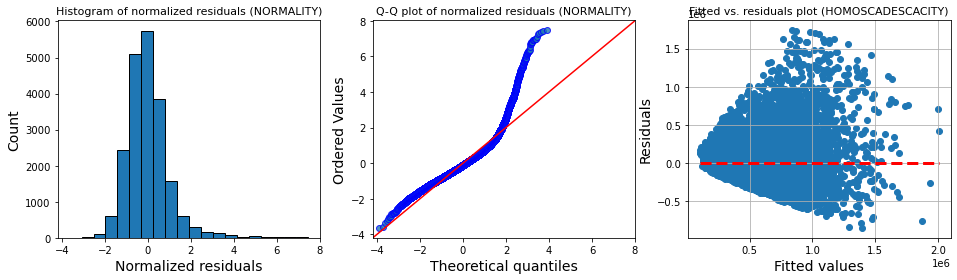

In [115]:
normality_homoscadescacity(model);

#### Violation of Normality and Homoscadescacity:

-  The distribution of the rediduals are NOT normal. The blue dots are the observed data while the red regression line is the prediction on the second graph. The residuals are NOT normally distributed as the blue dots are not falling on the red line. We may fix this by transforming the target variable and/or independent variables.
- There seems like a violation of homoscadescacity as well since the dots around the red line are not symmetric and follow a cone-like shape. We can try log transforming the target variable. 

### MODEL #2
- Using log transformed `log_price` as the target variable.

In [116]:
y = data['log_price']
X = data['sqft_living']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                 1.784e+04
Date:                Thu, 01 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:11:01   Log-Likelihood:                -9129.5
No. Observations:               20795   AIC:                         1.826e+04
Df Residuals:                   20793   BIC:                         1.828e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2151      0.007   1822.941      0.000      12.202      12.228
sqft_living     0.0004   3.01e-06    133.569      0.000       0.000       0.000
==============================================================================
Omnibus:                       81.946   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.464
Skew:                           0.058   Prob(JB):                     6.09e-15
Kurtosis:                       2.751   Cond. No.                     5.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

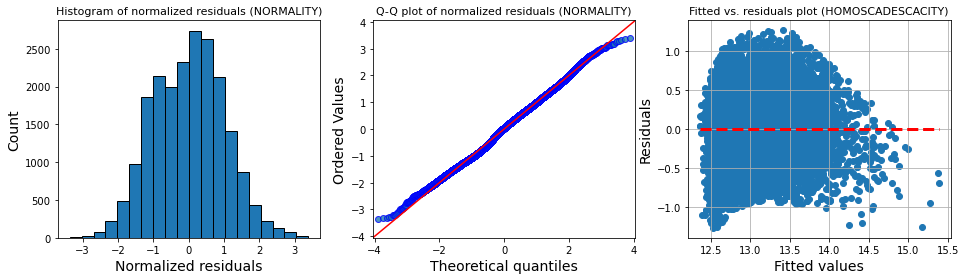

In [117]:
normality_homoscadescacity(model);

- **Normality and Homoscadescacity are mostly restored when we used log-transformed target variable!**

#### Summary interpretation:

- p value for `sqft_living` is statistically significant, meaning we can reject the null hypothesis that `sqft_living` does not correlate with price. In other words we can also say: there is enough evidence in favor of the idea that change in `sqft_living` is associated with change in `price` at the population level. This variable is a worthwhile addition to our regression model. 
- A Coefficient of Determination **R-Squared** value of .46 means that 46% of the change in price is explained by sqft_living. R-Squared explains how good our model is when compared to a baseline model where y = mx. We need to boost this number. 

### MODEL #3
- Using log transformed `log_sqft_living` as the predictor variable to see if it would improve R2.

In [118]:
y = data['log_price']
X = data['log_sqft_living']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                 1.606e+04
Date:                Thu, 01 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:11:02   Log-Likelihood:                -9620.7
No. Observations:               20795   AIC:                         1.925e+04
Df Residuals:                   20793   BIC:                         1.926e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.9165      0.048    142.919      0.000       6.822       7.011
log_sqft_living     0.8120      0.006    126.720      0.000       0.799       0.825
==============================================================================
Omnibus:                      162.730   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.312
Skew:                           0.107   Prob(JB):                     3.73e-28
Kurtosis:                       2.683   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

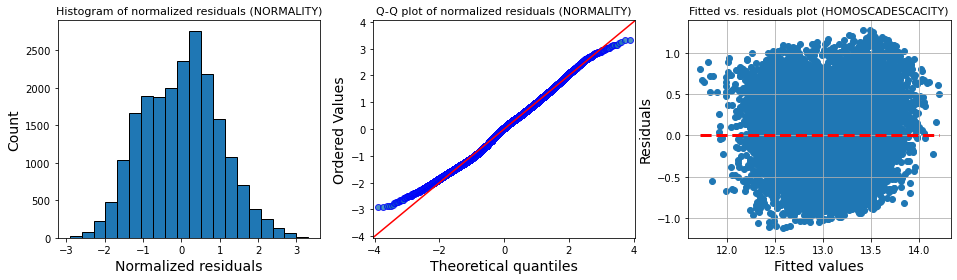

In [119]:
normality_homoscadescacity(model);

- This was worse in terms of R2, with a drop from .462 to .436.
- Normality is also slightly worse but homoscadescacity is better. 
- Let's go back to using un-transformed sqft_living. 

### MODEL #4
- Using `sqft_living` and `sqft_lot` as the 2 basic area variables.

In [120]:
y = data['log_price']
X = data[['sqft_living', 'sqft_lot']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     9032.
Date:                Thu, 01 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:11:02   Log-Likelihood:                -9069.5
No. Observations:               20795   AIC:                         1.815e+04
Df Residuals:                   20792   BIC:                         1.817e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2237      0.007   1816.812      0.000      12.211      12.237
sqft_living     0.0004   3.12e-06    131.935      0.000       0.000       0.000
sqft_lot    -2.726e-06   2.49e-07    -10.969      0.000   -3.21e-06   -2.24e-06
==============================================================================
Omnibus:                       67.767   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.733
Skew:                           0.048   Prob(JB):                     1.30e-12
Kurtosis:                       2.768   Cond. No.                     3.87e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Let's check the same model with log-transformed values again:

In [121]:
y = data['log_price']
X = data[['log_sqft_living', 'log_sqft_lot']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     8422.
Date:                Thu, 01 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:11:02   Log-Likelihood:                -9401.3
No. Observations:               20795   AIC:                         1.881e+04
Df Residuals:                   20792   BIC:                         1.883e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.2609      0.051    143.486      0.000       7.162       7.360
log_sqft_living     0.8573      0.007    128.042      0.000       0.844       0.870
log_sqft_lot       -0.0770      0.004    -21.058      0.000      -0.084      -0.070
==============================================================================
Omnibus:                      103.248   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.067
Skew:                           0.123   Prob(JB):                     6.18e-21
Kurtosis:                       2.783   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-square dropped to .448 from .465 when we used log-transformed values, so let's get back to untransformed independent variables. 

In [122]:
y = data['log_price']
X = data[['sqft_living', 'sqft_lot']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     9032.
Date:                Thu, 01 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:11:02   Log-Likelihood:                -9069.5
No. Observations:               20795   AIC:                         1.815e+04
Df Residuals:                   20792   BIC:                         1.817e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2237      0.007   1816.812      0.000      12.211      12.237
sqft_living     0.0004   3.12e-06    131.935      0.000       0.000       0.000
sqft_lot    -2.726e-06   2.49e-07    -10.969      0.000   -3.21e-06   -2.24e-06
==============================================================================
Omnibus:                       67.767   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.733
Skew:                           0.048   Prob(JB):                     1.30e-12
Kurtosis:                       2.768   Cond. No.                     3.87e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
# Compare how sqft_living and sqft_lot (alone) correlates with price:
print(data.corr()['price']['sqft_living'])
print(data.corr()['price']['sqft_lot'])

0.6846565855514448
0.13785310062451708


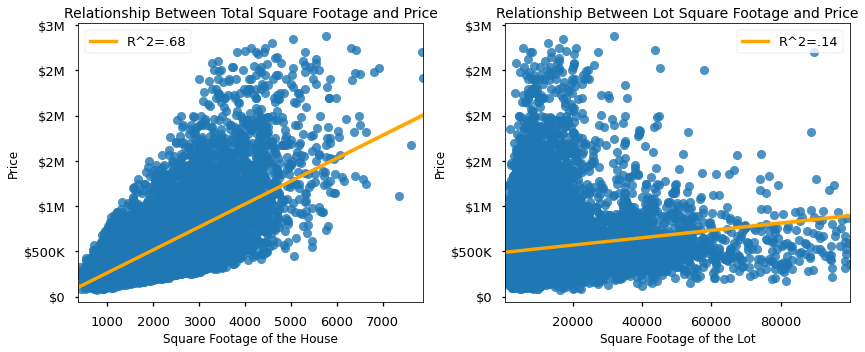

In [124]:
with plt.style.context('seaborn-talk'):
    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))
    fig.set_tight_layout(True)

    sns.regplot(x="sqft_living", y="price", ax=ax1, data=data, line_kws={"color": "orange","label":"R^2=.68"})
    ax1.legend()
    ax1.yaxis.set_major_formatter(formatter)
    ax1.set_title('Relationship Between Total Square Footage and Price',fontsize=14)
    ax1.set_xlabel("Square Footage of the House",fontsize=12)
    ax1.set_ylabel("Price",fontsize=12)

    sns.regplot(x="sqft_lot", y="price", ax=ax2, data=data, line_kws={"color": "orange","label":"R^2=.14"})
    ax2.legend()
    ax2.yaxis.set_major_formatter(formatter)
    ax2.set_title('Relationship Between Lot Square Footage and Price',fontsize=14)
    ax2.set_xlabel("Square Footage of the Lot",fontsize=12)
    ax2.set_ylabel("Price",fontsize=12)

    fig.savefig('./images/sqft_living_sqft_lot.png', dpi=300);


- `sqft_living` correlates very higly with `price` whereas `sqft_lot` correlates to a lower extent.
- However it is still important to keep them both in the regression model since `sqft_lot` is still significant. 

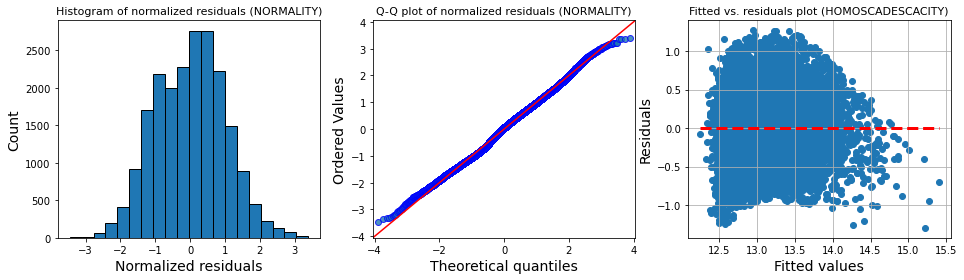

In [125]:
normality_homoscadescacity(model);

In [126]:
multicollinearity(X).head()

,0
const,6.7194
sqft_living,1.0787
sqft_lot,1.0787


- Normality and homoscadescacity are acceptable. 
- `sqft_lot` adds little to the model increasing R-squared slightly from 0.462 to 0.465. 
- `sqft_lot` is still highly statistically significant, so it is still worthwhile keeping it in the model. 

### MODEL #5
- Adding other meaningful variables except age, season and location

In [127]:
variables = ['sqft_living', 'sqft_lot', 'condition', 'grade'] 

y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.rsquared

0.5524238302446016

In [128]:
variables = ['sqft_living', 'sqft_lot', 'condition', 'grade', 'has_view', 'waterfront'] 

y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.rsquared

0.5732579679374332

In [129]:
variables = ['sqft_living', 'sqft_lot', 'condition', 'grade', 'has_view', 'waterfront',
             'bedrooms', 'bathrooms'] 

y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.rsquared

0.5743467319579401

In [130]:
variables = ['sqft_living', 'sqft_lot', 'condition', 'grade', 'has_view', 'waterfront',  
             'bedrooms', 'bathrooms', 'has_basement'] 

y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.rsquared)

0.5814723680773605


In [131]:
variables = ['sqft_living', 'sqft_lot', 'condition', 'grade', 'has_view', 'waterfront', 
             'bedrooms', 'bathrooms', 'has_basement', 'floors'] 

y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.rsquared)

0.5838257541322789


In [132]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     2916.
Date:                Thu, 01 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:11:06   Log-Likelihood:                -6455.9
No. Observations:               20795   AIC:                         1.293e+04
Df Residuals:                   20784   BIC:                         1.302e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.8182      0.026    417.001      0.000      10.767      10.869
sqft_living      0.0002   5.46e-06     38.487      0.000       0.000       0.000
sqft_lot     -2.019e-06   2.29e-07     -8.825      0.000   -2.47e-06   -1.57e-06
condition        0.0957      0.004     25.927      0.000       0.088       0.103
grade            0.1917      0.003     57.632      0.000       0.185       0.198
has_view         0.1823      0.009     21.442      0.000       0.166       0.199
waterfront       0.4379      0.031     13.929      0.000       0.376       0.500
bedrooms        -0.0218      0.003     -6.414      0.000      -0.028      -0.015
bathrooms       -0.0298      0.005     -5.735      0.000      -0.040      -0.020
has_basement     0.1154      0.005     21.519      0.000       0.105       0.126
floors           0.0618      0.006     10.841      0.000       0.051       0.073
==============================================================================
Omnibus:                       11.124   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.127
Skew:                           0.057   Prob(JB):                      0.00384
Kurtosis:                       3.004   Cond. No.                     2.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

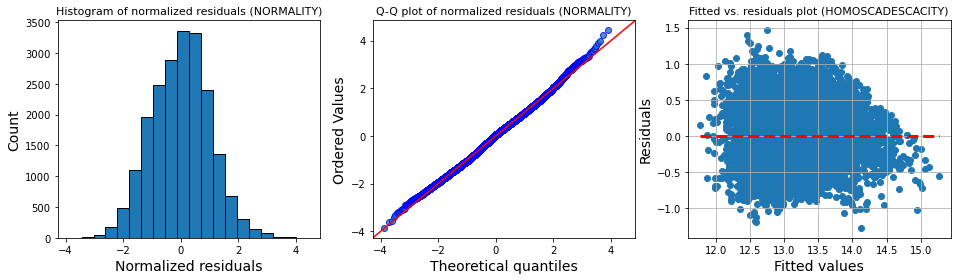

In [133]:
normality_homoscadescacity(model);

In [134]:
multicollinearity(X).head()
# All variables are below 5, so multicollinearity is not an issue:

,0
const,128.4061
sqft_living,4.2551
bathrooms,2.8644
grade,2.7441
floors,1.8117


- We increased R2 to 0.584 while still keeping normality and homoscadescacity intact. 
- All variables are statistically significant.

### MODEL #6
- Adding the month the house was sold (January is reference) to the model. 

In [135]:
variables = ['sqft_living', 'sqft_lot', 'condition', 'grade', 'has_view', 'waterfront', 
             'bedrooms', 'bathrooms', 'has_basement', 'floors',
             'april', 'august', 'december', 'february', 'july', 'june', 'march',
               'may', 'november', 'october', 'september'] 

y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     1401.
Date:                Thu, 01 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:11:07   Log-Likelihood:                -6397.6
No. Observations:               20795   AIC:                         1.284e+04
Df Residuals:                   20773   BIC:                         1.301e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.7876      0.028    388.561      0.000      10.733      10.842
sqft_living      0.0002   5.45e-06     38.704      0.000       0.000       0.000
sqft_lot     -2.006e-06   2.28e-07     -8.792      0.000   -2.45e-06   -1.56e-06
condition        0.0967      0.004     26.228      0.000       0.090       0.104
grade            0.1914      0.003     57.684      0.000       0.185       0.198
has_view         0.1817      0.008     21.422      0.000       0.165       0.198
waterfront       0.4368      0.031     13.926      0.000       0.375       0.498
bedrooms        -0.0222      0.003     -6.551      0.000      -0.029      -0.016
bathrooms       -0.0296      0.005     -5.706      0.000      -0.040      -0.019
has_basement     0.1150      0.005     21.493      0.000       0.105       0.125
floors           0.0621      0.006     10.928      0.000       0.051       0.073
april            0.0823      0.013      6.405      0.000       0.057       0.108
august           0.0157      0.013      1.191      0.234      -0.010       0.042
december        -0.0026      0.014     -0.185      0.853      -0.030       0.025
february         0.0069      0.014      0.484      0.629      -0.021       0.035
july             0.0192      0.013      1.485      0.137      -0.006       0.044
june             0.0282      0.013      2.179      0.029       0.003       0.054
march            0.0587      0.013      4.442      0.000       0.033       0.085
may              0.0409      0.013      3.210      0.001       0.016       0.066
november         0.0046      0.014      0.330      0.742      -0.023       0.032
october          0.0179      0.013      1.352      0.176      -0.008       0.044
september        0.0171      0.013      1.281      0.200      -0.009       0.043
==============================================================================
Omnibus:                        8.768   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.761
Skew:                           0.050   Prob(JB):                       0.0125
Kurtosis:                       3.008   Cond. No.                     2.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

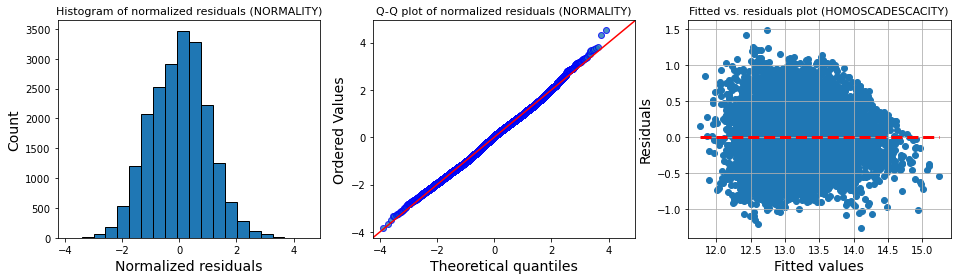

In [136]:
normality_homoscadescacity(model);

In [137]:
multicollinearity(X).head()

,0
const,147.8026
sqft_living,4.2570
may,3.0664
april,2.9603
july,2.9327


- R2 increased very slightly from 0.584 to .586 - normality and homoscadescacity are intact, and multicollinearity is not an issue. 
- It seems like it is the months of spring that have an impact on price, and there are a lot of non-signifcant months. Let's remove the nonsignificant months from the model to increase its performance (non-signifcance means that there is insufficient evidence in our sample to conclude that a correlation exists). 

#### Removing nonsignificant months:

In [138]:
variables = ['sqft_living', 'log_sqft_lot', 'condition', 'grade', 'has_view', 'waterfront', 
             'bedrooms', 'bathrooms', 'has_basement', 'floors',
             'april', 'march', 'may', 'june'] 

y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     2145.
Date:                Thu, 01 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:11:08   Log-Likelihood:                -6273.9
No. Observations:               20795   AIC:                         1.258e+04
Df Residuals:                   20780   BIC:                         1.270e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.4261      0.044    261.341      0.000      11.340      11.512
sqft_living      0.0002    5.7e-06     42.046      0.000       0.000       0.000
log_sqft_lot    -0.0708      0.004    -18.282      0.000      -0.078      -0.063
condition        0.0982      0.004     26.811      0.000       0.091       0.105
grade            0.1907      0.003     57.871      0.000       0.184       0.197
has_view         0.1831      0.008     21.726      0.000       0.167       0.200
waterfront       0.4626      0.031     14.825      0.000       0.401       0.524
bedrooms        -0.0182      0.003     -5.400      0.000      -0.025      -0.012
bathrooms       -0.0348      0.005     -6.741      0.000      -0.045      -0.025
has_basement     0.0884      0.006     15.869      0.000       0.077       0.099
floors           0.0170      0.006      2.695      0.007       0.005       0.029
april            0.0703      0.008      9.231      0.000       0.055       0.085
march            0.0469      0.008      5.709      0.000       0.031       0.063
may              0.0277      0.007      3.734      0.000       0.013       0.042
june             0.0182      0.008      2.357      0.018       0.003       0.033
==============================================================================
Omnibus:                        8.474   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.472
Skew:                           0.045   Prob(JB):                       0.0145
Kurtosis:                       3.041   Cond. No.                     4.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

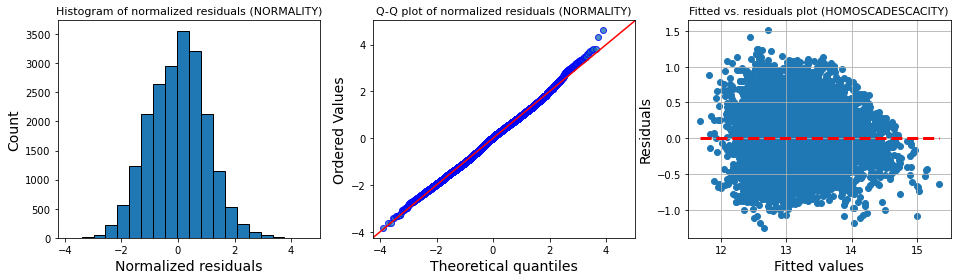

In [139]:
normality_homoscadescacity(model);

In [140]:
multicollinearity(X).head()

,0
const,371.0576
sqft_living,4.7046
bathrooms,2.8766
grade,2.7426
floors,2.2618


- R2 increased from 0.584 to 0.591 with the addition of month variable. 
- Normality and homoscadescacity intact. 
- All variables are statistically significant.

### MODEL #7
- adding `age<30`

In [141]:
variables = ['sqft_living', 'log_sqft_lot', 'condition', 'grade', 'has_view', 'waterfront', 
             'bedrooms', 'bathrooms', 'has_basement', 'floors',
             'april', 'march', 'may', 'june',
             'age<30'] 

y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     2094.
Date:                Thu, 01 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:11:08   Log-Likelihood:                -5994.7
No. Observations:               20795   AIC:                         1.202e+04
Df Residuals:                   20779   BIC:                         1.215e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.5175      0.043    265.933      0.000      11.433      11.602
sqft_living      0.0002   5.62e-06     42.609      0.000       0.000       0.000
log_sqft_lot    -0.0812      0.004    -21.121      0.000      -0.089      -0.074
condition        0.0685      0.004     17.912      0.000       0.061       0.076
grade            0.1993      0.003     60.904      0.000       0.193       0.206
has_view         0.1628      0.008     19.480      0.000       0.146       0.179
waterfront       0.4575      0.031     14.861      0.000       0.397       0.518
bedrooms        -0.0293      0.003     -8.735      0.000      -0.036      -0.023
bathrooms        0.0052      0.005      0.975      0.330      -0.005       0.016
has_basement     0.0646      0.006     11.570      0.000       0.054       0.076
floors           0.0631      0.007      9.667      0.000       0.050       0.076
april            0.0695      0.008      9.237      0.000       0.055       0.084
march            0.0461      0.008      5.688      0.000       0.030       0.062
may              0.0310      0.007      4.226      0.000       0.017       0.045
june             0.0179      0.008      2.348      0.019       0.003       0.033
age<30          -0.1677      0.007    -23.782      0.000      -0.182      -0.154
==============================================================================
Omnibus:                       16.922   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.241
Skew:                          -0.002   Prob(JB):                     6.64e-05
Kurtosis:                       3.149   Cond. No.                     4.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Remove `bathrooms` as it is not significant any more:
- It also correlates highly with `sqft_living`.

In [142]:
variables = ['sqft_living', 'log_sqft_lot', 'condition', 'grade', 'has_view', 'waterfront', 
             'bedrooms', 'has_basement', 'floors',
             'april', 'march', 'may', 'june',
             'age<30'] 

y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     2244.
Date:                Thu, 01 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:11:08   Log-Likelihood:                -5995.2
No. Observations:               20795   AIC:                         1.202e+04
Df Residuals:                   20780   BIC:                         1.214e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.5173      0.043    265.932      0.000      11.432      11.602
sqft_living      0.0002   5.29e-06     45.655      0.000       0.000       0.000
log_sqft_lot    -0.0814      0.004    -21.177      0.000      -0.089      -0.074
condition        0.0688      0.004     18.024      0.000       0.061       0.076
grade            0.1996      0.003     61.326      0.000       0.193       0.206
has_view         0.1629      0.008     19.489      0.000       0.146       0.179
waterfront       0.4577      0.031     14.868      0.000       0.397       0.518
bedrooms        -0.0286      0.003     -8.739      0.000      -0.035      -0.022
has_basement     0.0657      0.005     11.985      0.000       0.055       0.076
floors           0.0641      0.006      9.975      0.000       0.052       0.077
april            0.0694      0.008      9.236      0.000       0.055       0.084
march            0.0461      0.008      5.682      0.000       0.030       0.062
may              0.0309      0.007      4.218      0.000       0.017       0.045
june             0.0180      0.008      2.360      0.018       0.003       0.033
age<30          -0.1656      0.007    -24.725      0.000      -0.179      -0.152
==============================================================================
Omnibus:                       16.948   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.270
Skew:                          -0.002   Prob(JB):                     6.54e-05
Kurtosis:                       3.149   Cond. No.                     4.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

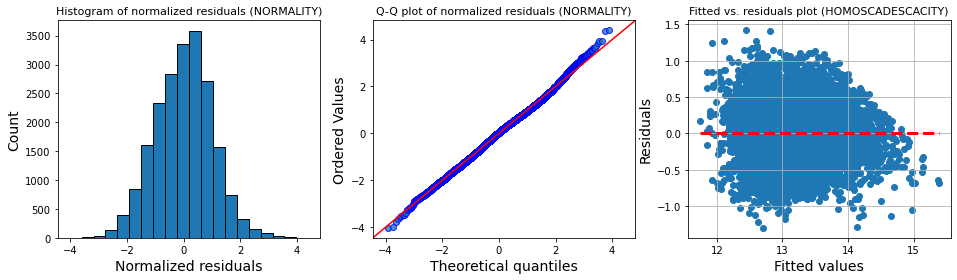

In [143]:
normality_homoscadescacity(model);

In [144]:
multicollinearity(X).head()

,0
const,373.9967
sqft_living,4.1618
grade,2.7467
floors,2.4096
age<30,2.1403


- R2 increased from .591 to .602 with the addition of `age` variable. 
- Normality and homoscadescacity intact. 

### FINAL MODEL #8
- adding location variables

In [145]:
variables = ['sqft_living', 'sqft_lot', 'condition', 'grade', 'has_view' ,'waterfront', 
             'bedrooms', 'has_basement', 'floors',
             'april', 'march', 'may', 'june',
             'age<30',
             'east', 'fareast','north', 'west']  
    
y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     3518.
Date:                Thu, 01 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:11:09   Log-Likelihood:                -1032.0
No. Observations:               20795   AIC:                             2102.
Df Residuals:                   20776   BIC:                             2253.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.6465      0.020    526.759      0.000      10.607      10.686
sqft_living      0.0002      4e-06     54.856      0.000       0.000       0.000
sqft_lot      1.424e-06   1.83e-07      7.793      0.000    1.07e-06    1.78e-06
condition        0.0833      0.003     27.626      0.000       0.077       0.089
grade            0.1608      0.003     61.928      0.000       0.156       0.166
has_view         0.1427      0.007     21.555      0.000       0.130       0.156
waterfront       0.5185      0.024     21.383      0.000       0.471       0.566
bedrooms        -0.0039      0.003     -1.500      0.134      -0.009       0.001
has_basement     0.0171      0.004      3.983      0.000       0.009       0.025
floors           0.0293      0.005      6.093      0.000       0.020       0.039
april            0.0679      0.006     11.458      0.000       0.056       0.079
march            0.0562      0.006      8.798      0.000       0.044       0.069
may              0.0182      0.006      3.145      0.002       0.007       0.029
june             0.0089      0.006      1.477      0.140      -0.003       0.021
age<30          -0.0247      0.005     -4.518      0.000      -0.035      -0.014
east             0.4873      0.005     90.539      0.000       0.477       0.498
fareast          0.4034      0.006     62.691      0.000       0.391       0.416
north            0.3322      0.008     40.510      0.000       0.316       0.348
west             0.5316      0.005    104.020      0.000       0.522       0.542
==============================================================================
Omnibus:                      560.606   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1339.083
Skew:                          -0.088   Prob(JB):                    1.67e-291
Kurtosis:                       4.231   Cond. No.                     2.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Remove `bedrooms` and `june` from the model:

In [146]:
variables = ['sqft_living', 'sqft_lot', 'condition', 'grade', 'has_view' ,'waterfront', 
              'has_basement', 'floors',
             'april', 'march', 'may', 
             'age<30',
             'east', 'fareast','north', 'west']  
    
y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     3958.
Date:                Thu, 01 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:11:09   Log-Likelihood:                -1034.2
No. Observations:               20795   AIC:                             2102.
Df Residuals:                   20778   BIC:                             2237.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.6363      0.019    561.915      0.000      10.599      10.673
sqft_living      0.0002   3.45e-06     62.591      0.000       0.000       0.000
sqft_lot      1.448e-06   1.82e-07      7.951      0.000    1.09e-06     1.8e-06
condition        0.0833      0.003     27.644      0.000       0.077       0.089
grade            0.1614      0.003     62.643      0.000       0.156       0.166
has_view         0.1435      0.007     21.760      0.000       0.131       0.156
waterfront       0.5201      0.024     21.473      0.000       0.473       0.568
has_basement     0.0169      0.004      3.943      0.000       0.009       0.025
floors           0.0288      0.005      6.010      0.000       0.019       0.038
april            0.0665      0.006     11.351      0.000       0.055       0.078
march            0.0548      0.006      8.661      0.000       0.042       0.067
may              0.0168      0.006      2.950      0.003       0.006       0.028
age<30          -0.0239      0.005     -4.392      0.000      -0.035      -0.013
east             0.4875      0.005     90.567      0.000       0.477       0.498
fareast          0.4042      0.006     62.973      0.000       0.392       0.417
north            0.3325      0.008     40.548      0.000       0.316       0.349
west             0.5326      0.005    104.948      0.000       0.523       0.543
==============================================================================
Omnibus:                      559.114   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1337.377
Skew:                          -0.086   Prob(JB):                    3.91e-291
Kurtosis:                       4.231   Cond. No.                     2.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

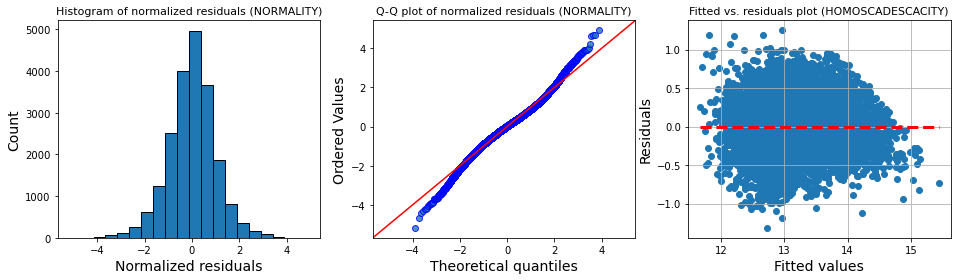

In [147]:
normality_homoscadescacity(model);

In [148]:
multicollinearity(X).head()

,0
const,115.1126
sqft_living,2.8640
grade,2.7727
age<30,2.2686
floors,2.1632


- R2 increased from .602 to .753 with the addition of locations! 
- Homoscadescacity is still intact. 
- Normality is worse with the addition of this variable but it is still acceptable. 
- No multicollinearity.

In [149]:
# Print the coefficients using a better format: 
coefs = model.params.apply('{0:.6f}'.format)
coefs = pd.DataFrame(coefs).reset_index()
coefs = coefs.rename({'index':'var', 0:'coef'}, axis =1)
coefs.coef = pd.to_numeric(coefs.coef)
coefs

,var,coef
0,const,10.636341
1,sqft_living,0.000216
2,sqft_lot,0.000001
3,condition,0.083309
4,grade,0.161366
5,has_view,0.143503
6,waterfront,0.520139
7,has_basement,0.016903
8,floors,0.028842
9,april,0.066522


In [150]:
# https://data.library.virginia.edu/interpreting-log-transformations-in-a-linear-model/
# Because the target variable is log-transformed let's exponentiate the coefficients. 
coefs['exp_coef'] = ((np.exp(coefs.coef) - 1) * 100).apply('{0:.6f}'.format)
coefs

,var,coef,exp_coef
0,const,10.636341,4161920.394068
1,sqft_living,0.000216,0.021602
2,sqft_lot,0.000001,0.000100
3,condition,0.083309,8.687760
4,grade,0.161366,17.511498
5,has_view,0.143503,15.431027
6,waterfront,0.520139,68.226147
7,has_basement,0.016903,1.704666
8,floors,0.028842,2.926196
9,april,0.066522,6.878448


#### Model summary (from the model with UNSCALED coefficients):

- R-squared of 0.753 means that the dependent variables explain 75% of the variability in price. 
- All variables are statistically significnant (p <.05) meaning we can reject the null that are not related to price. 
- Normality is acceptaple, Homoscadescacity is preserved, no presence of multicollinearity, 
- Durbin-Watson score is between 1.5 and 2.5, meaning: no first-order autocorrelation - independence of residuals. Autocorrelation refers to the degree of correlation of the same variable between two successive time intervals. Autocorrelation would ential that here is a pattern such that values in the series can be predicted based on preceding values in the series. 
- Skewness is between -0.5 and 0.5, it is approximately symmetric.
- Kurtosis is 4.2 which is not ideal but acceptable. An increased kurtosis (>3) can be visualized as a thinner “bell” with a higher peak. Hair et al. (2010) and Bryne (2010) argues that data is considered normal if skewness is between ‐2 to +2 and kurtosis is between ‐7 to +7.

#### Coefficient interpretation:


- For every 1 unit increase in `sqft_living` price increases by about 0.022 % (given all other variables are kept constant). 
- For every 100 sqft increase of the house, price increases by about 2.2 %. 
- Average sqft of a house is 2000. Given all other variables are kept constant, if you increase a house size from 2000 to 3000 sqft you would increase price by 22%.


- For every 1 unit increase in `sqft_lot` price increases by 0.0001 %.
- For every 10000 sqft increase of the lot, price increases by about 1 %. 


- For every 1 unit increase in `grade` price increases by 17 %.


- Being `waterfront` increases price by 68% compared to being non waterfront (given all other factors are same).
- Having `view` increases price by 15% compared to not having a view (given all other factors are same).


- For every `floor` added, price incrases by 2.9%. 


- Houses sold in `April` are 6.9% more expensive than those sold in winter-fall or summer. 
- Houses sold in `March` are 5.6% more expensive than those sold in winter-fall or summer.
- Houses sold in `May` are 1.7% more expensive than those sold in winter-fall or summer.


- Houses in `West-Seattle` are 70% more expensive than those in South (given all other factors are the same). 
- Houses in `East` area are 63% more expensive than those in South.

#### Scaling the variables to see the most impactful variables in order:

In [151]:
# Perform a min-max scaling on the continuous variables:
for var in ['sqft_living','sqft_lot','condition' , 'grade', 'floors']: 
    data[f"scaled_"+var] = (data[var] - min(data[var])) / (max(data[var]) - min(data[var]))

In [152]:
# Run the model on scaled variables:
variables = variables = ['scaled_sqft_living', 'scaled_sqft_lot', 'scaled_condition', 'scaled_grade', 'has_view' ,'waterfront', 
             'has_basement', 'scaled_floors',
             'april', 'march', 'may', 
             'age<30',
             'east', 'fareast','north', 'west']  
    
y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     3958.
Date:                Thu, 01 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:11:10   Log-Likelihood:                -1034.2
No. Observations:               20795   AIC:                             2102.
Df Residuals:                   20778   BIC:                             2237.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 11.3133      0.012    943.542      0.000      11.290      11.337
scaled_sqft_living     1.6236      0.026     62.591      0.000       1.573       1.674
scaled_sqft_lot        0.1439      0.018      7.951      0.000       0.108       0.179
scaled_condition       0.3332      0.012     27.644      0.000       0.310       0.357
scaled_grade           1.6137      0.026     62.643      0.000       1.563       1.664
has_view               0.1435      0.007     21.760      0.000       0.131       0.156
waterfront             0.5201      0.024     21.473      0.000       0.473       0.568
has_basement           0.0169      0.004      3.943      0.000       0.009       0.025
scaled_floors          0.0721      0.012      6.010      0.000       0.049       0.096
april                  0.0665      0.006     11.351      0.000       0.055       0.078
march                  0.0548      0.006      8.661      0.000       0.042       0.067
may                    0.0168      0.006      2.950      0.003       0.006       0.028
age<30                -0.0239      0.005     -4.392      0.000      -0.035      -0.013
east                   0.4875      0.005     90.567      0.000       0.477       0.498
fareast                0.4042      0.006     62.973      0.000       0.392       0.417
north                  0.3325      0.008     40.548      0.000       0.316       0.349
west                   0.5326      0.005    104.948      0.000       0.523       0.543
==============================================================================
Omnibus:                      559.114   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1337.377
Skew:                          -0.086   Prob(JB):                    3.91e-291
Kurtosis:                       4.231   Cond. No.                         28.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

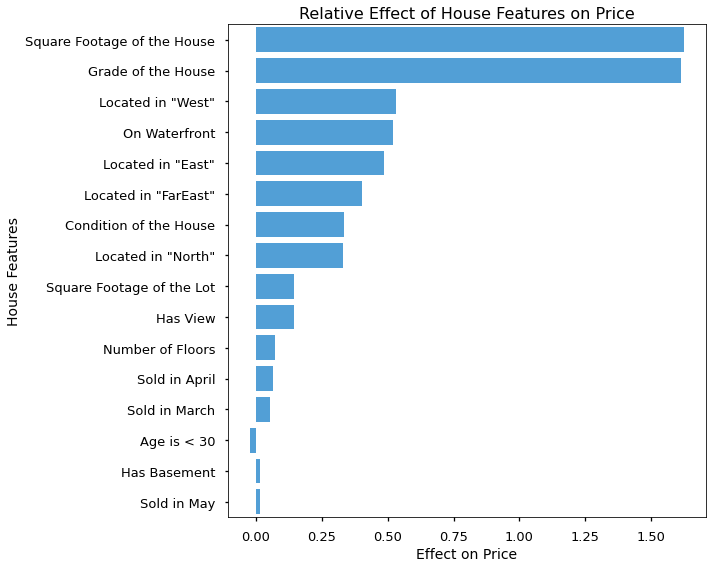

In [153]:
# Drop the model coefficient for graphing purposes:
coeff = model.params.drop('const')

# Sort the coefficients: 
coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()]

# Plot the coefficients using a TORNADO PLOT:
with plt.style.context('seaborn-talk'):
    base_color = sns.color_palette("husl", 9)[6]
    fig, ax  = plt.subplots(figsize=(10, 8))
    sns.barplot(x=coeff.values, y=coeff.index, color = base_color, ax=ax, orient='h')
    ax.set_title('Relative Effect of House Features on Price', fontsize=16)
    ax.set_xlabel("Effect on Price", fontsize=14)
    ax.set_ylabel("House Features", fontsize=14)
    ax.set_yticklabels(labels=['Square Footage of the House', 'Grade of the House', 'Located in "West"', 'On Waterfront', 'Located in "East"',
                              'Located in "FarEast"', 'Condition of the House', 'Located in "North"', 'Square Footage of the Lot', 'Has View',
                              'Number of Floors', 'Sold in April', 'Sold in March','Age is < 30' , 'Has Basement' , 'Sold in May'])
    fig.tight_layout();
    
    fig.savefig('./images/TornadoPlot_Coefs.png', dpi=300)


#### Tornado Plot Summary:
- `Square footage of the house` is the most impactful variable as expected.
- `Grade` of the house is also very impactful (however this is not a very useful variable for our stakeholder since they rebuild the houses). 
- Other impactful variables in order are: 
    - `Being on Waterfront`
    - `Not being located in the south`
    - `Condition of the house`
    - `square footage of the lot`
    - `Having a view`
    - `number of Floors`
    - `Going on the Market in April or March`
    - `young age`
    - `having a basement`


### Specific recommendations based on regression results: 

1. Invest on increasing the total square footage of the house as much as possible (rather than investing on the lot size). This is the most important feature to invest on. For every 1000 sqft increase in the house price increases by about 22%.


2. Being on waterfront increases the house price by 68%, so invest on houses on waterfront. 


3. Put the house on the market in April which increases the price by 6.9% compared to selling it in other seasons. The next best month is March with a 5.6% increase. 


4. Invest on houses in Seattle for 70% increase in price, and Medina, Bellevue, Mercer Island and Kirkland for a 63% increase compared to the South.

### Limitations 
* Skewed data required outlier removal or data transformation.
* Zipcodes could not be used in regression due to the huge number of levels (70).
* City to zipcode mapping did not work due to the zipcode and city boundaries overlapping. 

### Improvements
* Clustering zipcodes into meaningful groups would be helpful. 
* Gathering more detailed location info using API calls would enrich the modeling process.

### EXTRA EXPLORATION FOR THE BLOG POST #2:

-0.08320831350039018


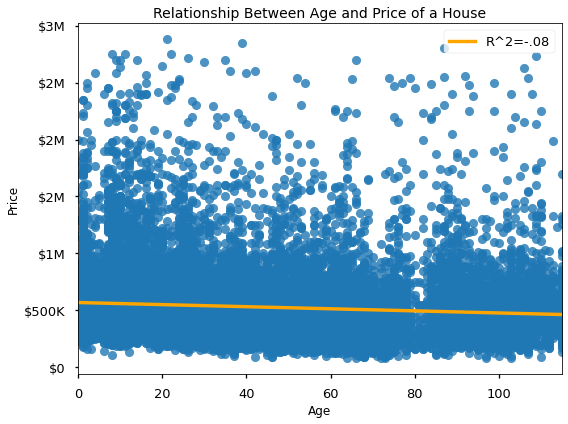

In [155]:
with plt.style.context('seaborn-talk'):
    fig, ax = plt.subplots(figsize=(8, 6))
    fig.set_tight_layout(True)

    sns.regplot(x="age", y="price", ax=ax, data=data, line_kws={"color": "orange","label":"R^2=-.08"})
    ax.legend()
    ax.yaxis.set_major_formatter(formatter)
    ax.set_title('Relationship Between Age and Price of a House',fontsize=14)
    ax.set_xlabel("Age",fontsize=12)
    ax.set_ylabel("Price",fontsize=12)
    
    print(data.corr()['age']['price'])
    
    fig.savefig('./images/BlogPost_age_price_relationship.png', dpi=300);


In [156]:
variables =  ['age']  
    
y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     231.0
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           6.87e-52
Time:                        11:11:23   Log-Likelihood:                -15456.
No. Observations:               20795   AIC:                         3.092e+04
Df Residuals:                   20793   BIC:                         3.093e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.1178      0.006   2107.069      0.000      13.106      13.130
age           -0.0018      0.000    -15.199      0.000      -0.002      -0.002
==============================================================================
Omnibus:                      447.544   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              480.134
Skew:                           0.355   Prob(JB):                    5.50e-105
Kurtosis:                       3.225   Cond. No.                         90.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-0.3398529387261946


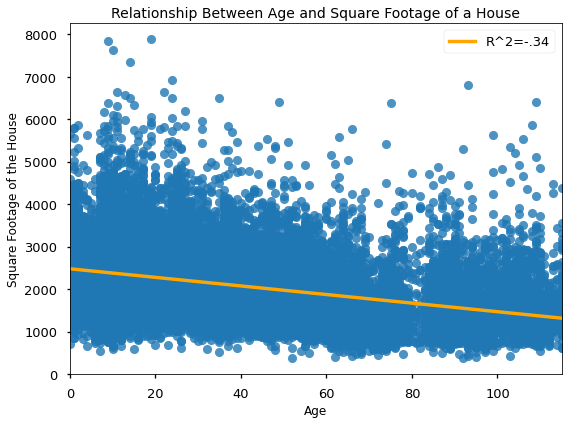

In [157]:
with plt.style.context('seaborn-talk'):
    fig, ax = plt.subplots(figsize=(8, 6))
    fig.set_tight_layout(True)

    sns.regplot(x="age", y="sqft_living", ax=ax, data=data, line_kws={"color": "orange","label":"R^2=-.34"})
    ax.legend()
    ax.set_title('Relationship Between Age and Square Footage of a House',fontsize=14)
    ax.set_xlabel("Age",fontsize=12)
    ax.set_ylabel("Square Footage of the House",fontsize=12)
    
    print(data.corr()['age']['sqft_living'])
    
    fig.savefig('./images/BlogPost_age_sqft_living_relationship.png', dpi=300);

In [158]:
variables =  ['age', 'sqft_living']  

y = data['log_price']
X = data[variables]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     9588.
Date:                Thu, 01 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:11:25   Log-Likelihood:                -8776.1
No. Observations:               20795   AIC:                         1.756e+04
Df Residuals:                   20792   BIC:                         1.758e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.0502      0.009   1337.152      0.000      12.033      12.068
age             0.0025   9.37e-05     26.811      0.000       0.002       0.003
sqft_living     0.0004   3.15e-06    136.881      0.000       0.000       0.000
==============================================================================
Omnibus:                       19.350   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.430
Skew:                          -0.029   Prob(JB):                     0.000164
Kurtosis:                       2.870   Cond. No.                     7.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Exporting to PDF using nbconvert:
1. install nbconvert: `! pip install nbconvert`
2. install MacTeX from tps://tug.org/mactex/
3. `! export PATH=/Library/TeX/texbin:$PATH`
4. `! jupyter nbconvert --to PDF NOTEBOOKNAME.ipynb`